## Capstone Project_1

## Project proposal to predict credit card approval

### Section 1: Questions to Answer

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
2. How is it going to impact the banking sector?
3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India

Banks all over globe are financial Institutions which borrows and lends money from customers and to customers. During Such process banks analyse customers data to check worthiness for Credit Card.

- If Credit Card is being isseud to any of Bank User, user's worthiness to get a Credit Card needs to be check in order to get
- good profitabilities for Bank.
- to check whether the user is not default.
- to check at what extent any user of bank is eligible for any Credit Card Categories such as gold, Silver or platinum.


So in our problem statment we are given a dataset of customers whose credit card approval has been rejected or accepted.

we need thorughly analysis on this dataset and find out such patterns by doing EDA. Afterwards we try to make a ML Model to predict a customers whose approval are rejected and whose are accepted. On the basis of our ML Model predictions we will compare it with the actual data and try to get overall conclusion on how our model works.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df1 = pd.read_csv('Credit_card.csv')
df1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [3]:
df2 = pd.read_csv('Credit_card_label.csv')
df2

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [4]:
df = pd.merge(df1,df2, how = 'outer', on = 'Ind_ID')

In [5]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
df.shape

(1548, 19)

We will work on Credit_card.csv dataset which contains 19 features and 1548 observations. Each observation contains personal, financial, and employment data of an individual. The target variable is binary and is stored in Credit_card_label.csv file.

Now, let's explore the existing features of the dataset.

- df1 and df2 both DataFrames are merged. Final Dataset is formed.
- Datset has 1548 Rows and 19 Columns in total.


### Check for Null Values in Dataset

In [9]:
# to check for nan values

null_values = df.isna().mean()*100
null_values.sort_values(ascending = False)

Type_Occupation    31.524548
Annual_income       1.485788
Birthday_count      1.421189
GENDER              0.452196
Ind_ID              0.000000
Employed_days       0.000000
Family_Members      0.000000
EMAIL_ID            0.000000
Phone               0.000000
Work_Phone          0.000000
Mobile_phone        0.000000
Housing_type        0.000000
Marital_status      0.000000
EDUCATION           0.000000
Type_Income         0.000000
CHILDREN            0.000000
Propert_Owner       0.000000
Car_Owner           0.000000
label               0.000000
dtype: float64

In [10]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

<Axes: >

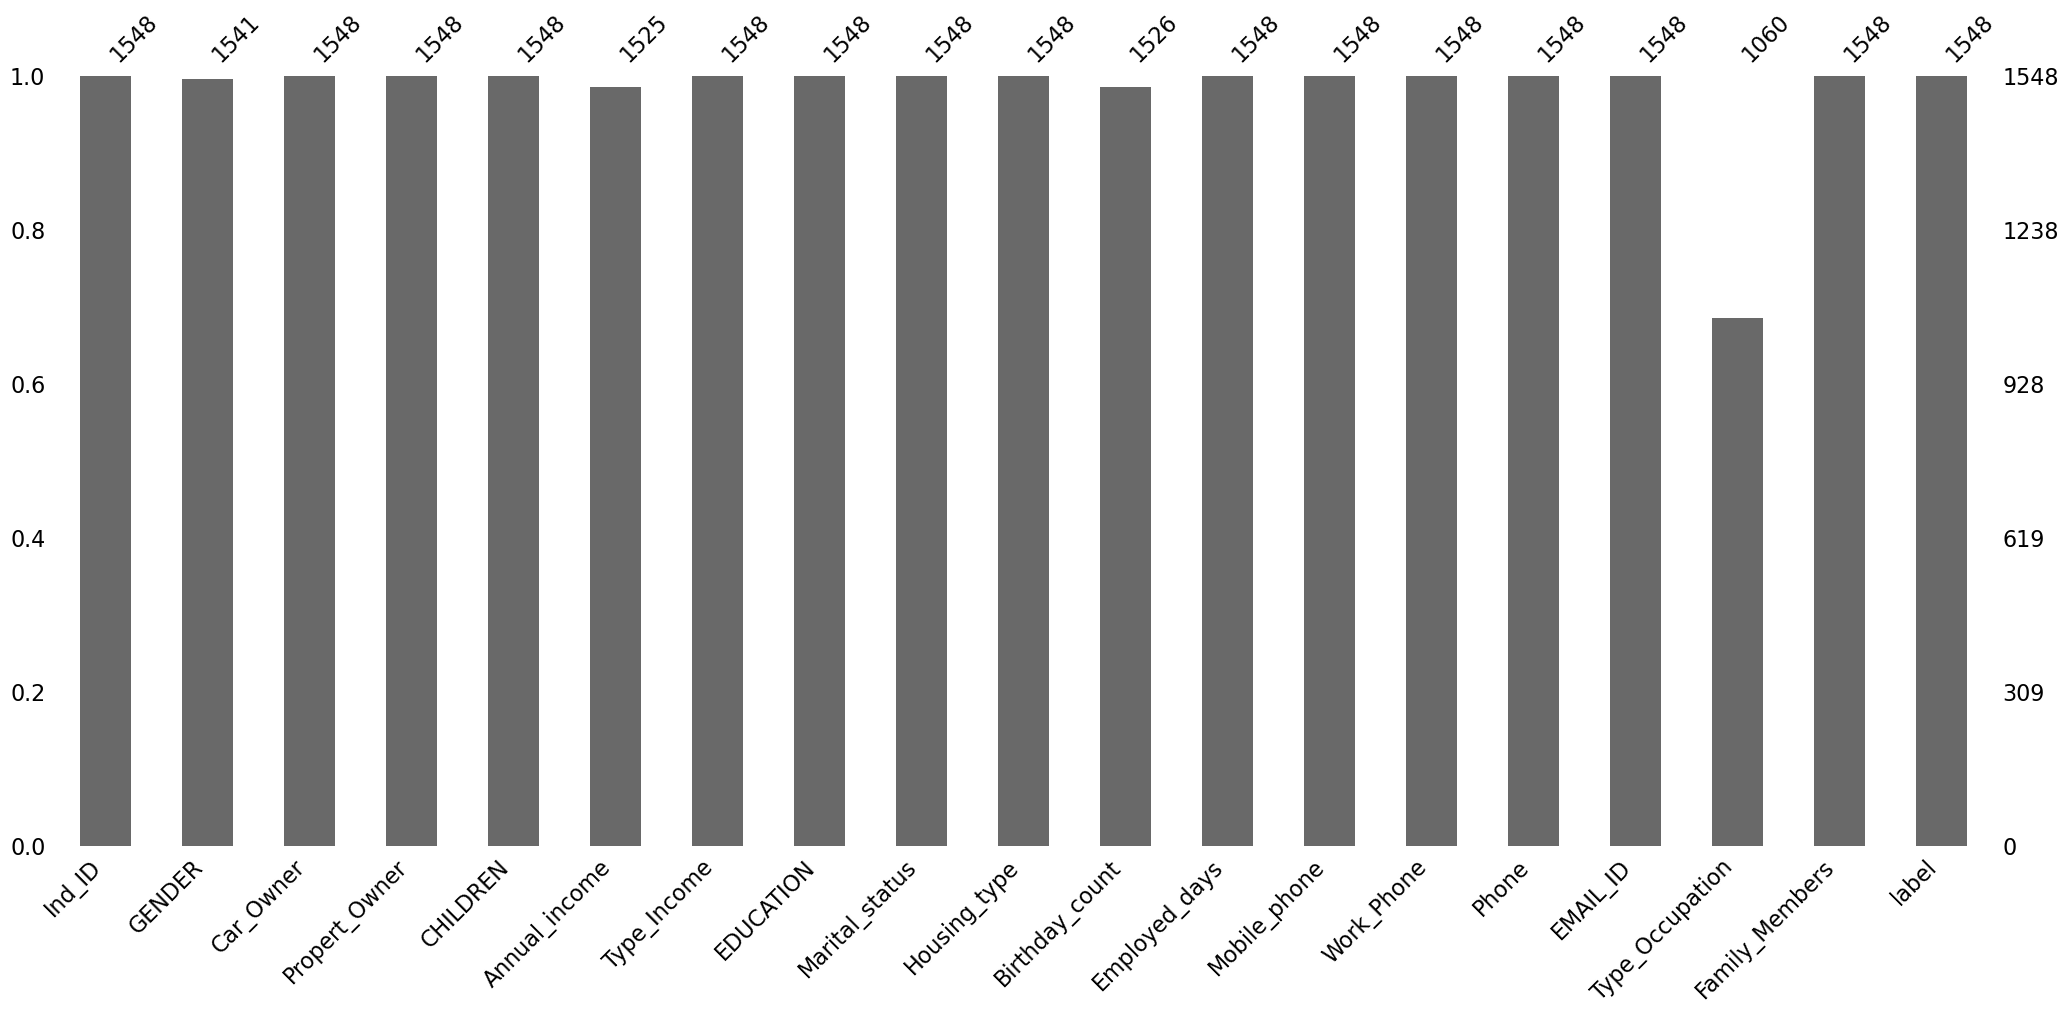

In [11]:
import missingno as msno
msno.bar(df)

<Axes: >

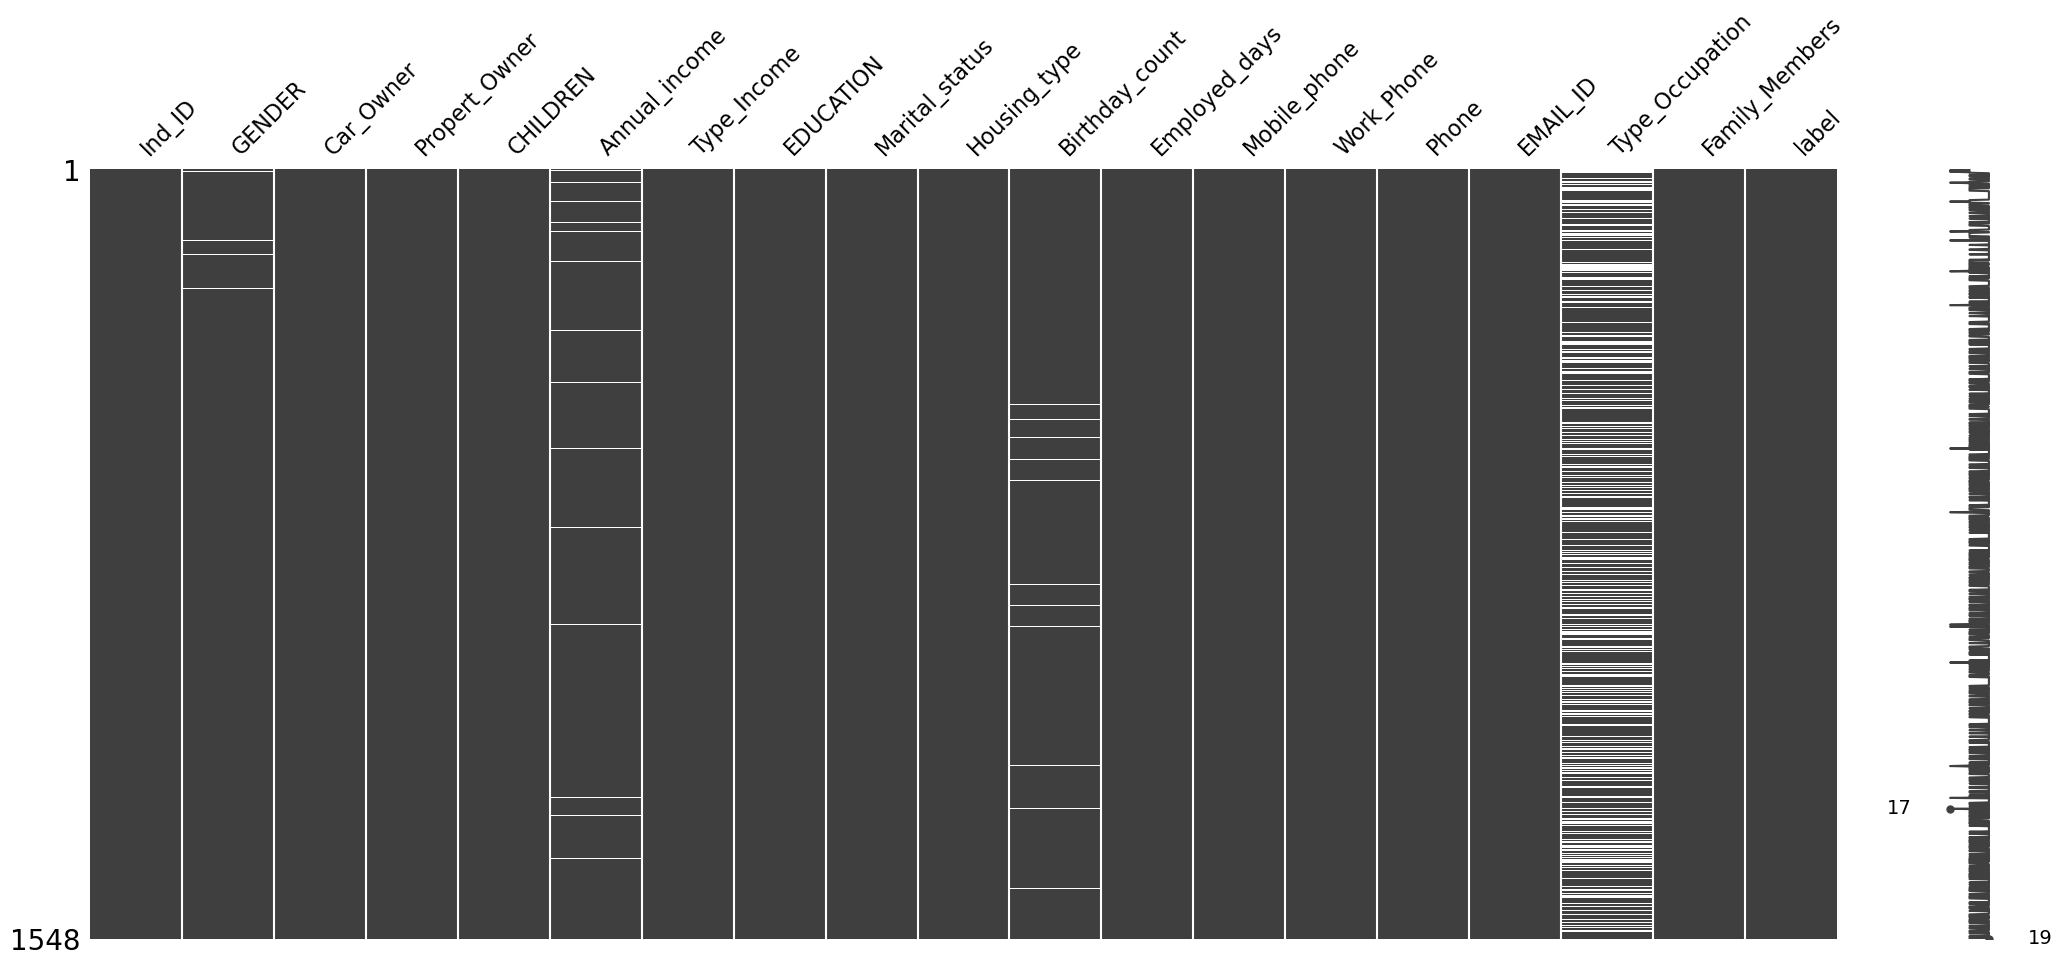

In [12]:
msno.matrix(df)

- Around **31% missing values** are present in Types of Occupation (needs to be fixed or Removed in later analysis)
- Annual Income, Birth_Count and Gender are also having minor % of missing values (0.5-1.5 %).
- There might be relationship of missing values between Annual_income and Type_Occupation.

In [13]:
# to lower all the column's name
df.columns = df.columns.str.lower()

In [14]:
df.nunique()

ind_id             1548
gender                2
car_owner             2
propert_owner         2
children              6
annual_income       115
type_income           4
education             5
marital_status        5
housing_type          6
birthday_count     1270
employed_days       956
mobile_phone          1
work_phone            2
phone                 2
email_id              2
type_occupation      18
family_members        7
label                 2
dtype: int64

**Observation:**
- col ind_id has all unique id which can be removed.
- mobile_phone has only one category which can also be removed.

**Both columns have no influence on furthure analysis.**

In [15]:
df.drop(columns = {'ind_id', 'mobile_phone'}, inplace = True)

In [16]:
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,type_occupation,family_members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           1541 non-null   object 
 1   car_owner        1548 non-null   object 
 2   propert_owner    1548 non-null   object 
 3   children         1548 non-null   int64  
 4   annual_income    1525 non-null   float64
 5   type_income      1548 non-null   object 
 6   education        1548 non-null   object 
 7   marital_status   1548 non-null   object 
 8   housing_type     1548 non-null   object 
 9   birthday_count   1526 non-null   float64
 10  employed_days    1548 non-null   int64  
 11  work_phone       1548 non-null   int64  
 12  phone            1548 non-null   int64  
 13  email_id         1548 non-null   int64  
 14  type_occupation  1060 non-null   object 
 15  family_members   1548 non-null   int64  
 16  label            1548 non-null   int64  
dtypes: float64(2),

In [18]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*60)

F    973
M    568
Name: gender, dtype: int64
************************************************************
N    924
Y    624
Name: car_owner, dtype: int64
************************************************************
Y    1010
N     538
Name: propert_owner, dtype: int64
************************************************************
0     1091
1      305
2      134
3       16
4        1
14       1
Name: children, dtype: int64
************************************************************
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: annual_income, Length: 115, dtype: int64
************************************************************
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: type_income, dtype: int64
************************************************************
Secondary / secondary spe

In [19]:
cat_cols = ['gender','car_owner','propert_owner','type_income','education','marital_status','housing_type',
             'work_phone','phone','email_id','type_occupation','label']
print(len(cat_cols))
cat_cols

12


['gender',
 'car_owner',
 'propert_owner',
 'type_income',
 'education',
 'marital_status',
 'housing_type',
 'work_phone',
 'phone',
 'email_id',
 'type_occupation',
 'label']

In [20]:
num_cols = [i for i in list(df.columns) if i not in cat_cols]
print(len(num_cols))
num_cols

5


['children',
 'annual_income',
 'birthday_count',
 'employed_days',
 'family_members']

**Observation:**

-From Total 17 Columns, There are
- **12 Categorical Columns**
- out of 12 Categorical columns-
1. **nominal** are - gender, car_owner, propert_owner
2. **Ordinal** are - type_income, education, housing_type,work_phone, phone, email_id, type_occupation,label

- only **3 are Continous Numerical Columns (Annual_income, birthday_count, employed_days).**
- **2 are discrete Numerical Columns (children and Family_members)**



In [21]:
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,type_occupation,family_members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1


## EDA- Exploratory Data Analysis
### Dealing with missing Values

In [22]:
df.shape

(1548, 17)

In [23]:
df[df.duplicated()]

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,type_occupation,family_members,label
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
13,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,0,Cooking staff,2,1
18,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,-18907.0,-2470,0,0,0,Sales staff,1,1
42,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23286.0,365243,0,0,0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,F,N,Y,0,112500.0,Working,Higher education,Married,House / apartment,-11432.0,-820,1,0,0,Core staff,2,0
1520,M,N,Y,0,157500.0,Working,Incomplete higher,Married,House / apartment,-13682.0,-453,1,1,0,NaN,2,0
1522,M,N,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18719.0,-1473,1,1,0,Laborers,3,0
1527,F,Y,N,0,126000.0,State servant,Incomplete higher,Single / not married,House / apartment,-11978.0,-5206,1,0,0,Core staff,1,0


In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.shape

(1386, 17)

In [26]:
df.isna().sum().sort_values(ascending = False)

type_occupation    438
annual_income       23
birthday_count      22
gender               7
family_members       0
email_id             0
phone                0
work_phone           0
employed_days        0
housing_type         0
car_owner            0
marital_status       0
education            0
type_income          0
children             0
propert_owner        0
label                0
dtype: int64

- There are total 162 duplicated records in dataset, it should be droped while doing furthure analysis.
- Since there is more than 30 % missing values in dataset, it is advisable to remove the whole columns or features to use for Model Prediction.
- Minor missing Values can be replaced using Standard Imputations Techniques (mean, median, mode, KNN or MICE)

In [27]:
df.drop(columns = {'type_occupation'}, inplace = True)

In [28]:
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,family_members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1


In [29]:
df.shape

(1386, 16)

In [30]:
object_cols = [i for i in df.columns if df[i].dtype == 'object']
df[object_cols] = df[object_cols].astype('category')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1547
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          1379 non-null   category
 1   car_owner       1386 non-null   category
 2   propert_owner   1386 non-null   category
 3   children        1386 non-null   int64   
 4   annual_income   1363 non-null   float64 
 5   type_income     1386 non-null   category
 6   education       1386 non-null   category
 7   marital_status  1386 non-null   category
 8   housing_type    1386 non-null   category
 9   birthday_count  1364 non-null   float64 
 10  employed_days   1386 non-null   int64   
 11  work_phone      1386 non-null   int64   
 12  phone           1386 non-null   int64   
 13  email_id        1386 non-null   int64   
 14  family_members  1386 non-null   int64   
 15  label           1386 non-null   int64   
dtypes: category(7), float64(2), int64(7)
memory usage: 118.9 KB


**converting all object Dtype columns in categorical Dtypes**

In [32]:
cat_cols = [i for i in df.columns if i in cat_cols]
df[cat_cols]

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,label
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,0,0,0,1
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1
5,NaN,Y,N,Pensioner,Higher education,Married,House / apartment,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,State servant,Secondary / secondary special,Married,House / apartment,0,1,0,0
1543,F,N,Y,Commercial associate,Higher education,Married,House / apartment,0,0,0,0
1544,F,N,N,Commercial associate,Incomplete higher,Single / not married,House / apartment,0,0,0,0
1546,M,Y,N,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,0


[Text(0, 0, '1249'), Text(0, 0, '137')]

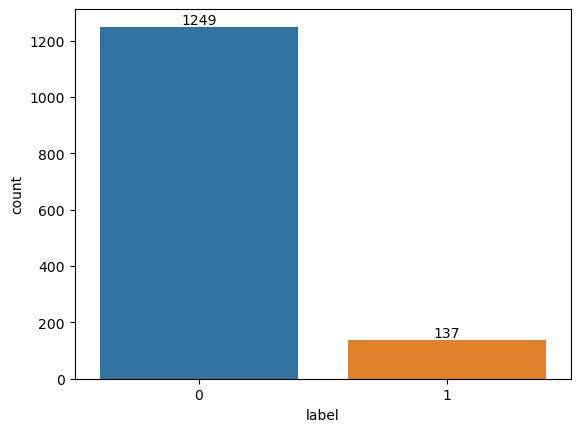

In [33]:
pltlabel = sns.countplot(x = df['label'], data = df)
pltlabel.bar_label(pltlabel.containers[0])

From above graph, it can be seen that majority of customers got approval for Credit Card.

It is indicating a Imbalanced dataset (which can be processed furthure while Model Building)

In [34]:
df[cat_cols]

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,label
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,0,0,0,1
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment,1,1,0,1
5,NaN,Y,N,Pensioner,Higher education,Married,House / apartment,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,State servant,Secondary / secondary special,Married,House / apartment,0,1,0,0
1543,F,N,Y,Commercial associate,Higher education,Married,House / apartment,0,0,0,0
1544,F,N,N,Commercial associate,Incomplete higher,Single / not married,House / apartment,0,0,0,0
1546,M,Y,N,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,0


### **Analysis for Categorical Features:**

['M', 'F', 'F', 'F', NaN, ..., 'M', 'F', 'F', 'M', 'F']
Length: 1386
Categories (2, object): ['F', 'M']


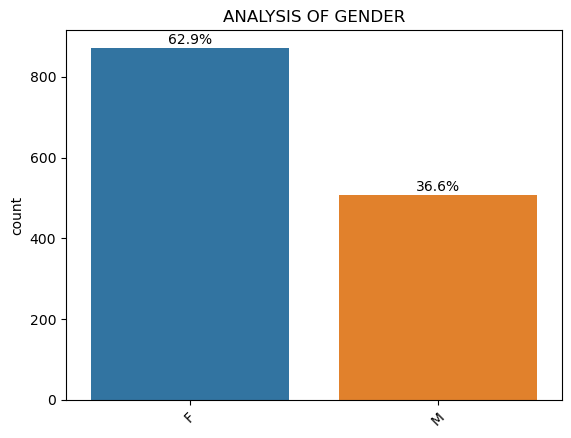

['Y', 'Y', 'Y', 'Y', 'Y', ..., 'Y', 'N', 'N', 'Y', 'Y']
Length: 1386
Categories (2, object): ['N', 'Y']


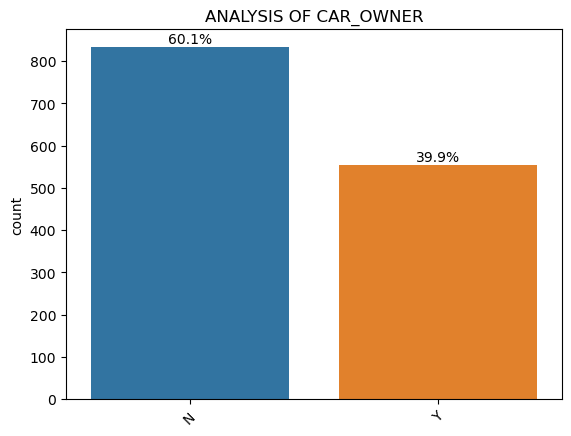

['Y', 'N', 'N', 'N', 'N', ..., 'N', 'Y', 'N', 'N', 'Y']
Length: 1386
Categories (2, object): ['N', 'Y']


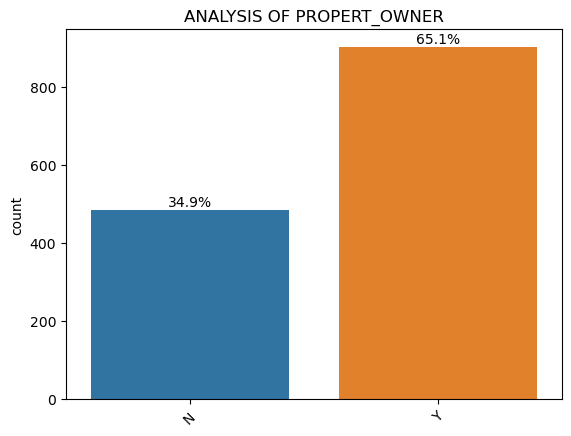

['Pensioner', 'Commercial associate', 'Commercial associate', 'Commercial associate', 'Pensioner', ..., 'State servant', 'Commercial associate', 'Commercial associate', 'Working', 'Working']
Length: 1386
Categories (4, object): ['Commercial associate', 'Pensioner', 'State servant', 'Working']


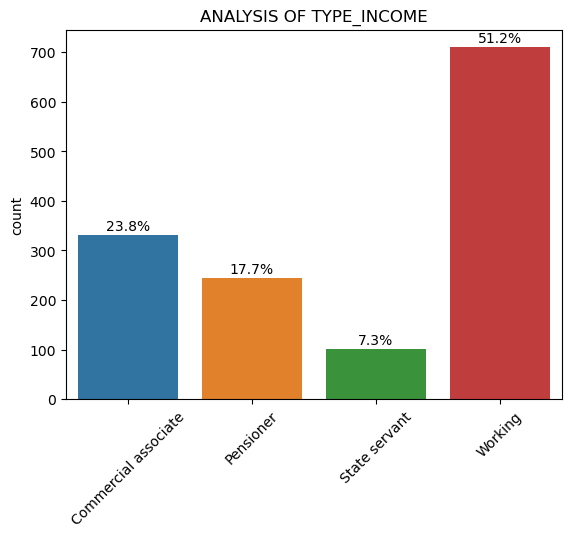

['Higher education', 'Higher education', 'Higher education', 'Higher education', 'Higher education', ..., 'Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Secondary / secondary special', 'Higher education']
Length: 1386
Categories (5, object): ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']


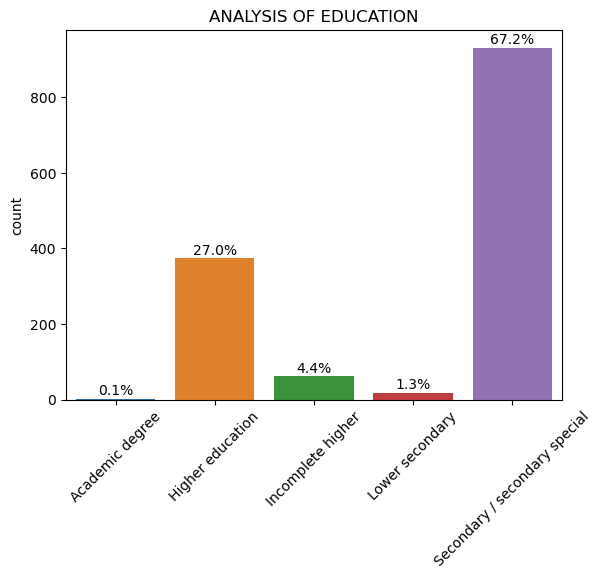

['Married', 'Married', 'Married', 'Married', 'Married', ..., 'Married', 'Married', 'Single / not married', 'Civil marriage', 'Married']
Length: 1386
Categories (5, object): ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow']


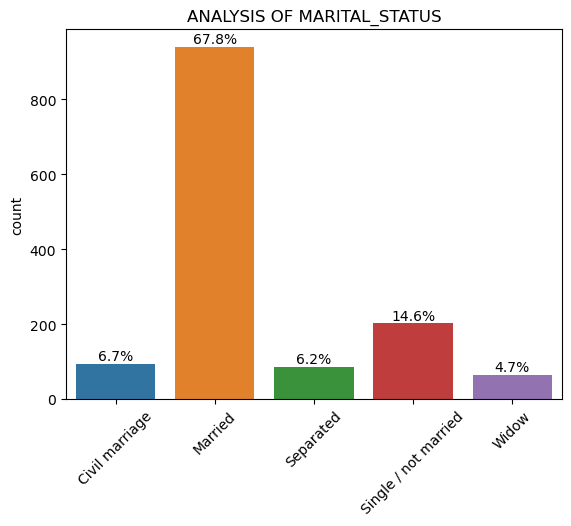

['House / apartment', 'House / apartment', 'House / apartment', 'House / apartment', 'House / apartment', ..., 'House / apartment', 'House / apartment', 'House / apartment', 'House / apartment', 'House / apartment']
Length: 1386
Categories (6, object): ['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents']


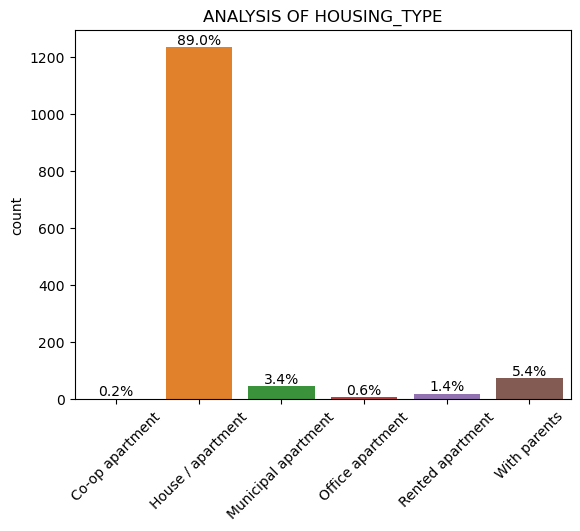

[0 1 1 ... 0 1 0]


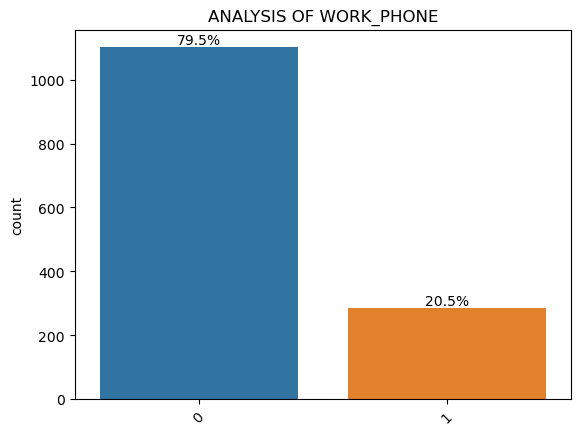

[0 1 1 ... 0 1 0]


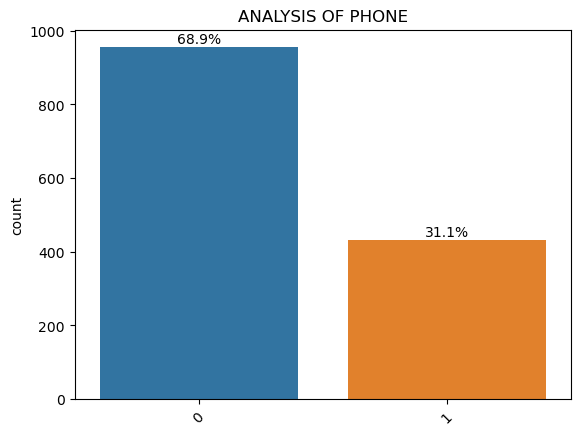

[0 0 0 ... 0 0 0]


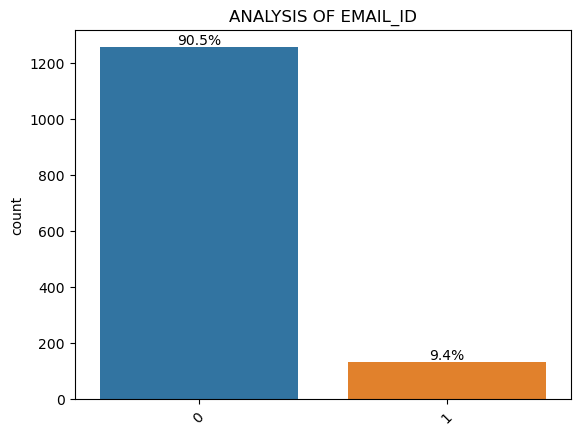

[1 1 1 ... 0 0 0]


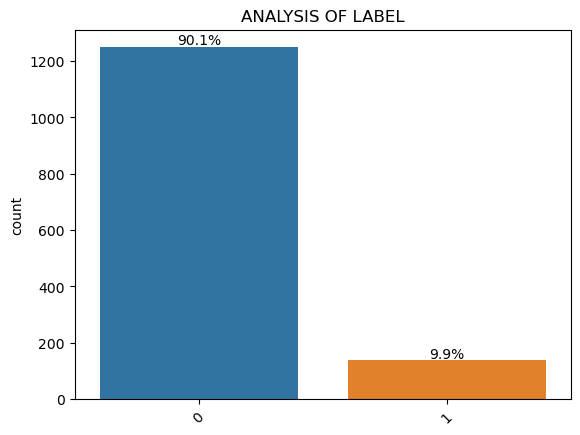

In [35]:
for i in df[cat_cols]:
  print(df[i].values)
  ax1 = sns.countplot(data = df, x = df[i].values)
  for j in ax1.patches:
    p = '{:.1f}%'.format(round(j.get_height()/len(df)*100,2))
    x = j.get_x()+j.get_width()/2
    y = j.get_height()+10
    ax1.annotate(p,(x,y), ha = 'center')

  plt.xticks(rotation=45)
  plt.title(f"ANALYSIS OF {i.upper()}")


  plt.show()

**Analysis:**

- We are having a majority of Female Customers (around 63%) in our dataset.
- Customers who are having no car are around 60%.
- 65 % Customers are having property.
- 51% Customers are working.
- The Highest Education is secondary which is around 67%.
- customers who are married - 67%
- 89% customers are staying in house/apartment.
- Customers are having work phone and email are 80% and 90% respectively.

- around 90% customers got credit card approval.

### **Analysis for Numerical Features:**

[0 0 0 ... 0 0 0]


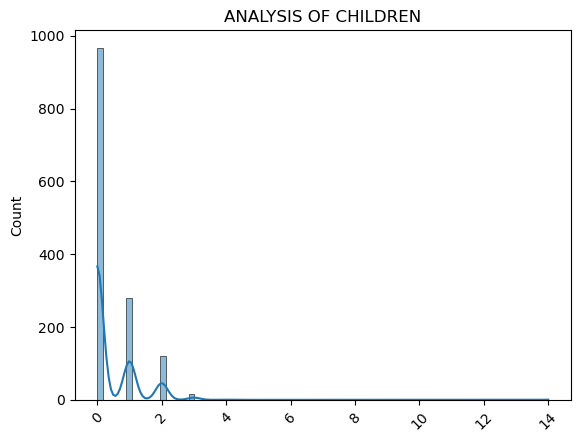

[180000. 315000. 315000. ... 225000. 270000. 225000.]


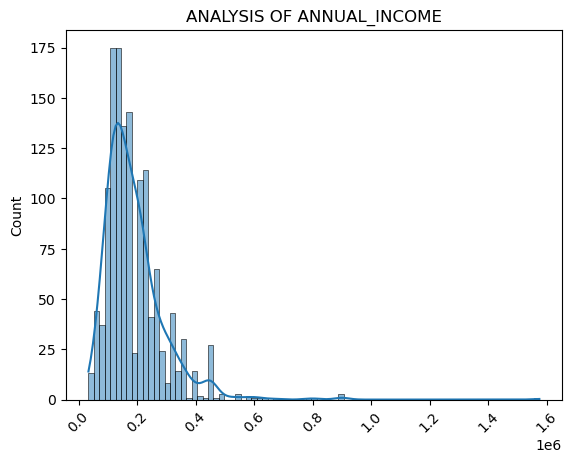

[-18772. -13557.     nan ... -10229. -15292. -16601.]


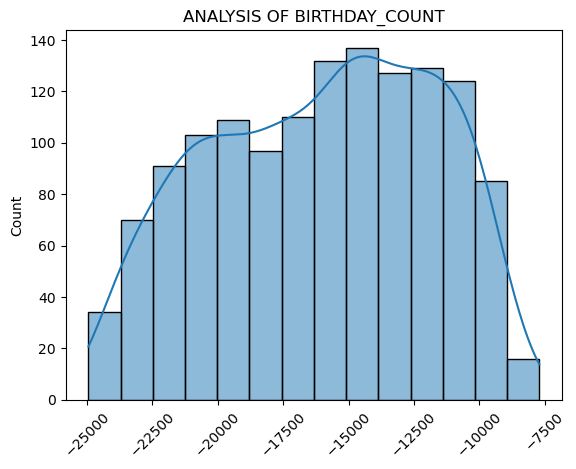

[365243   -586   -586 ...  -1209   -645  -2859]


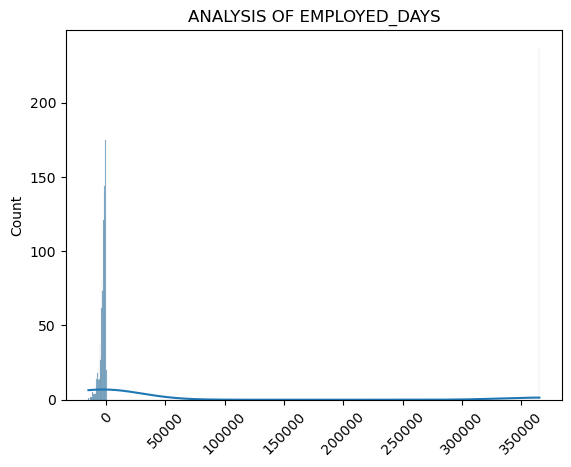

[2 2 2 ... 1 2 2]


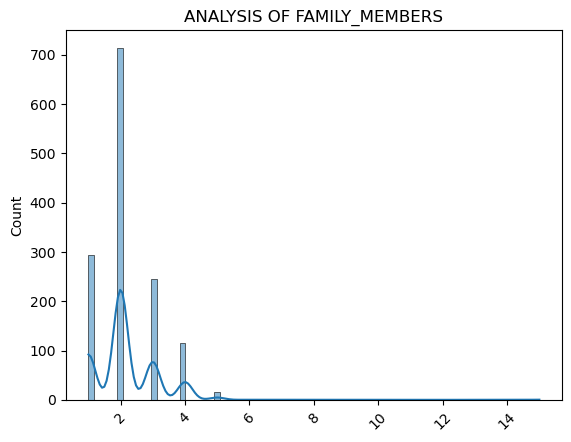

In [36]:
for i in df[num_cols]:
  print(df[i].values)
  ax1 = sns.histplot(data = df, x = df[i].values, kde = True)
  # for j in ax1.patches:
  #   p = '{:.1f}%'.format(round(j.get_height()/len(df)*100,2))
  #   x = j.get_x()+j.get_width()/2
  #   y = j.get_height()+10
  #   ax1.annotate(p,(x,y), ha = 'center')

  plt.xticks(rotation=45)
  plt.title(f"ANALYSIS OF {i.upper()}")

  plt.show()

[0 0 0 ... 0 0 0]


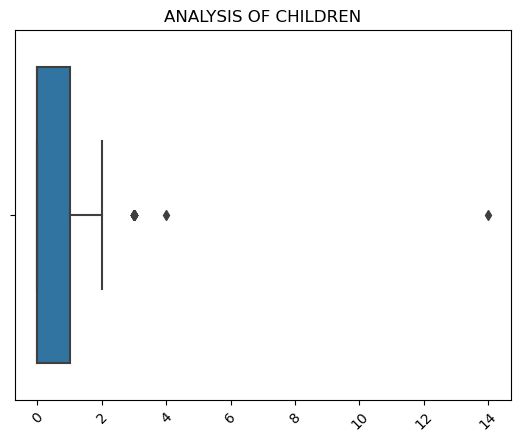

[180000. 315000. 315000. ... 225000. 270000. 225000.]


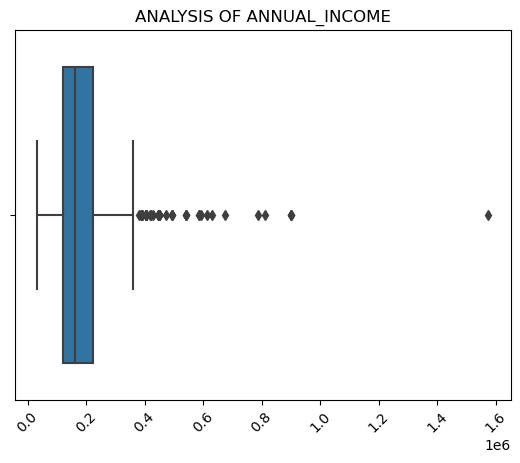

[-18772. -13557.     nan ... -10229. -15292. -16601.]


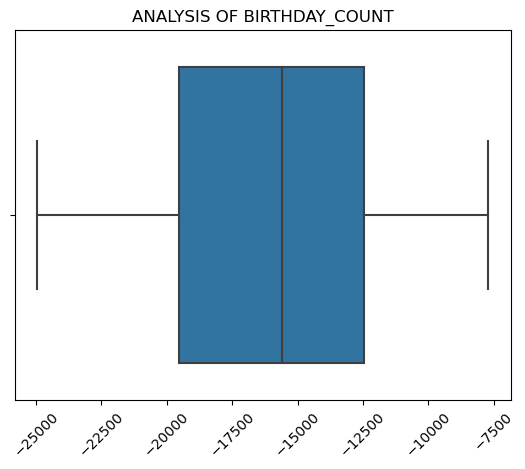

[365243   -586   -586 ...  -1209   -645  -2859]


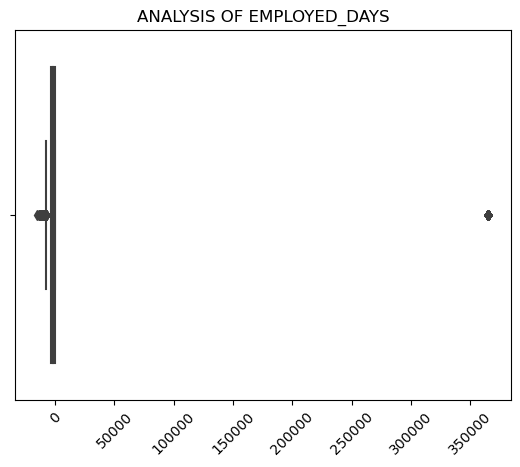

[2 2 2 ... 1 2 2]


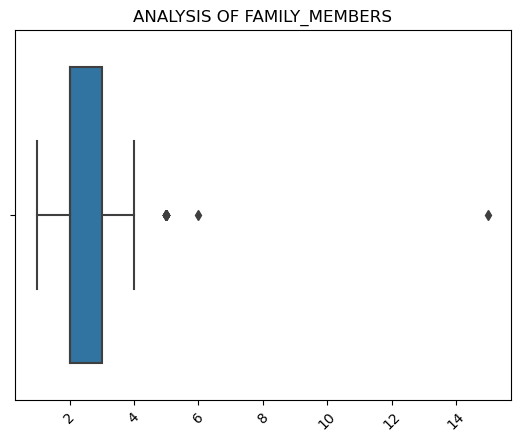

In [37]:
for i in df[num_cols]:
  print(df[i].values)
  ax1 = sns.boxplot(data = df, x = df[i].values)
  # for j in ax1.patches:
  #   p = '{:.1f}%'.format(round(j.get_height()/len(df)*100,2))
  #   x = j.get_x()+j.get_width()/2
  #   y = j.get_height()+10
  #   ax1.annotate(p,(x,y), ha = 'center')

  plt.xticks(rotation=45)
  plt.title(f"ANALYSIS OF {i.upper()}")

  plt.show()

**outcomes :**
statestically it shows that
- Children dataset might be right skewed or having outliers.
- Annual income right skewed.
- Birth_count might be normal distributed (Feature Engineering can be done to do furthure analysis)
- Employed_days is not correctly shown (we need to do feature Engineering in such case, there might be extreme outliers present or any extreme values which can be ommitted while model Building)
- family members - right skewed or outliers


In [38]:
df[num_cols]

,children,annual_income,birthday_count,employed_days,family_members
0,0,180000.0,-18772.0,365243,2
1,0,315000.0,-13557.0,-586,2
2,0,315000.0,NaN,-586,2
3,0,NaN,-13557.0,-586,2
5,0,315000.0,-13557.0,-586,2
...,...,...,...,...,...
1542,1,360000.0,-11294.0,-3536,3
1543,0,NaN,-11957.0,-2182,2
1544,0,225000.0,-10229.0,-1209,1
1546,0,270000.0,-15292.0,-645,2


<Axes: >

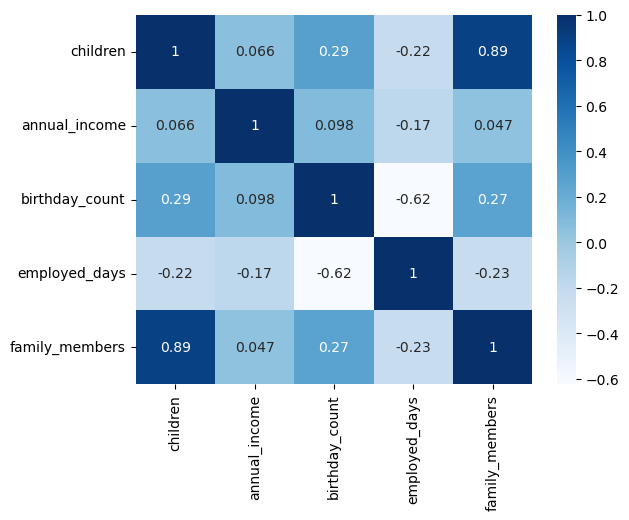

In [39]:
corr = df[num_cols].corr()
corr
sns.heatmap(corr, annot = True, cmap="Blues")

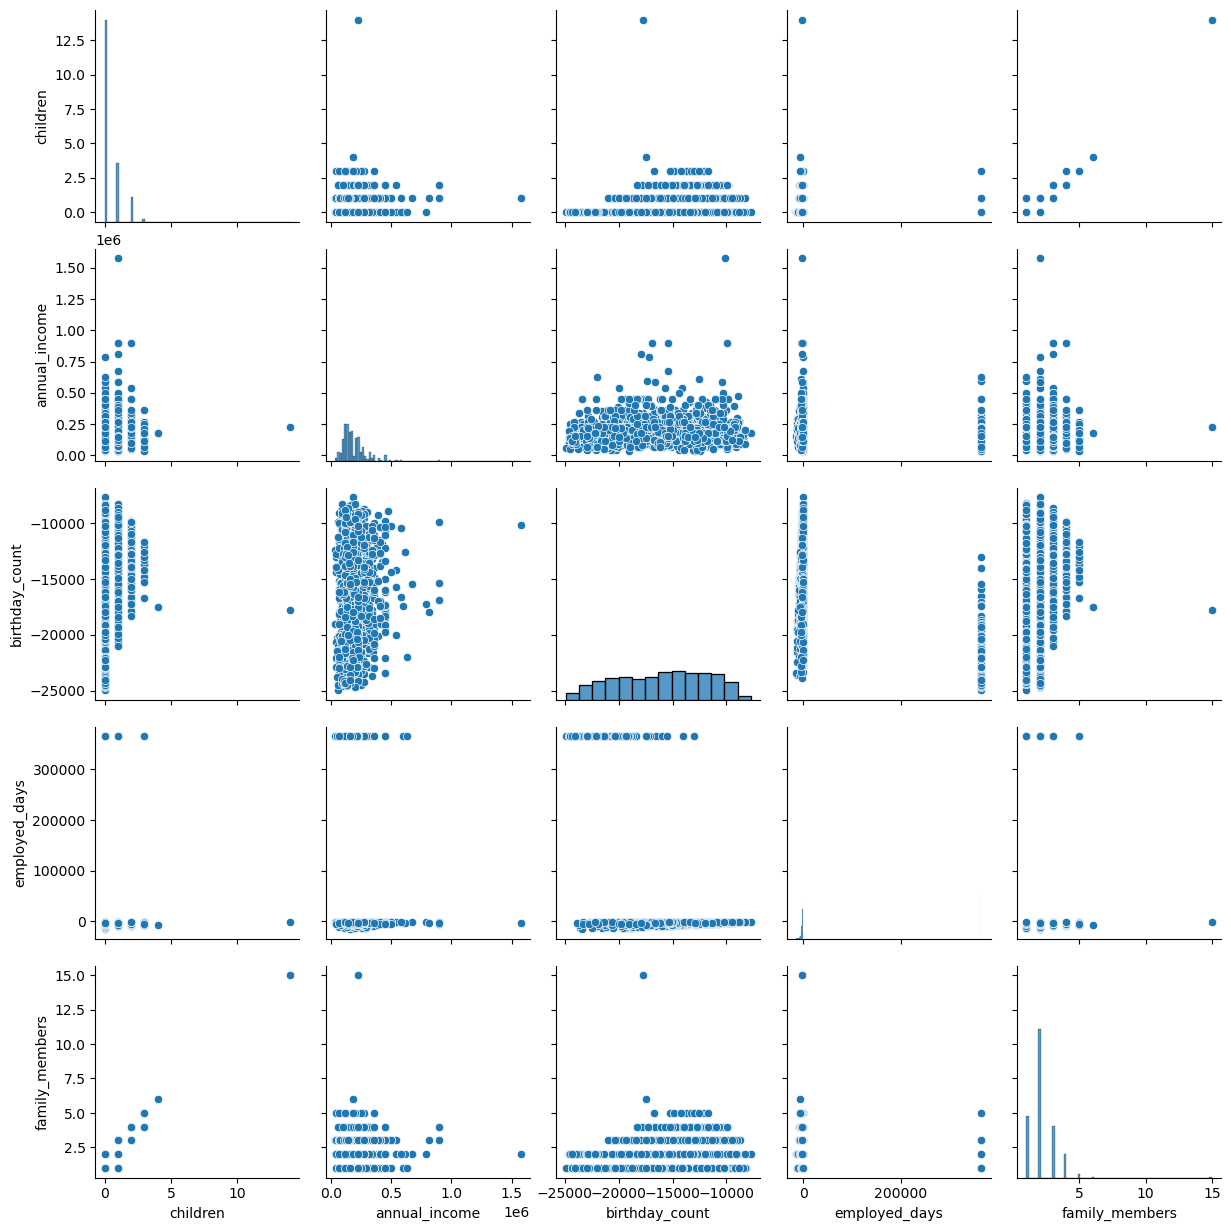

In [40]:
sns.pairplot(df[num_cols])

**Important : Correlation between indepndent features**
- Heatmap shows a correlation between family_members and Children.
- If such kind of correlation are present in independent Feature then it will be better to remove one of them while Model Building
- rest features are not so correlated with each other so that we can do furthure analysis.

In [41]:
df[num_cols].skew()

children          4.750842
annual_income     3.329552
birthday_count   -0.177392
employed_days     1.748591
family_members    2.332374
dtype: float64

In [42]:
df[num_cols].describe()

,children,annual_income,birthday_count,employed_days,family_members
count,1386.000000,1.363000e+03,1364.000000,1386.000000,1386.000000
mean,0.424242,1.894781e+05,-16033.953812,60265.073593,2.176046
std,0.792813,1.069330e+05,4216.837346,138577.322363,0.960236
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000
25%,0.000000,1.215000e+05,-19543.000000,-3153.750000,2.000000
50%,0.000000,1.620000e+05,-15611.500000,-1542.500000,2.000000
75%,1.000000,2.250000e+05,-12445.000000,-412.000000,3.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000


**As a general rule of thumb:**
 - If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

 - children - highly right skewed
 - annual_income - highly right skewed
 - birthday_count- Normal Disribution.
 - employed_days- right skewed
 - family_members - highly right skewed


 - Std, mean and mode is far more for the employed_days(it needs to be treated in feature engineering)

**Note : employed_days and Birthday_count can not be negative values so we can feature it in positive values and can be converted into year of experience and age (which can be derived by dividing 365 days)**


<Axes: >

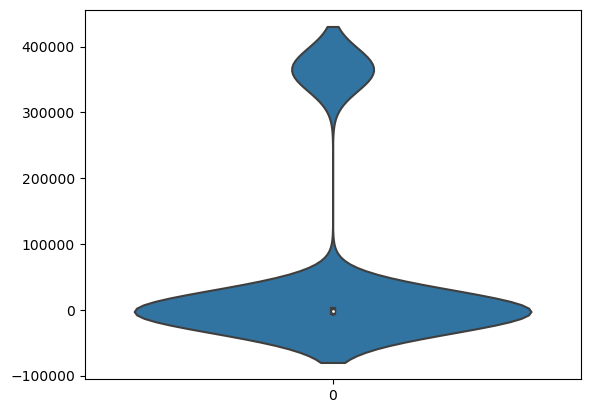

In [43]:
sns.violinplot(df.employed_days)

<Axes: xlabel='employed_days', ylabel='Count'>

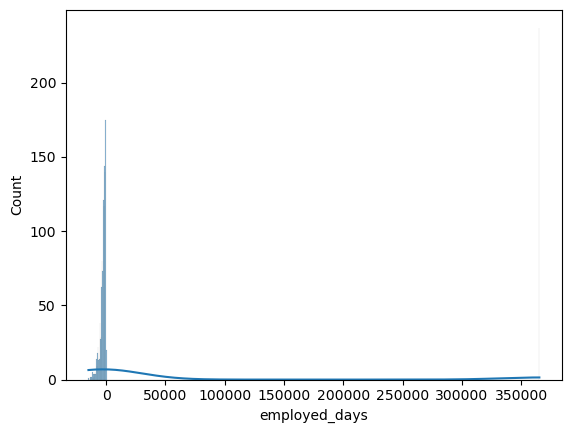

In [44]:
sns.histplot(df.employed_days, kde = True)

In [45]:
df.employed_days.value_counts(ascending = True)

-4534        1
-2906        1
-1915        1
-1267        1
-1256        1
          ... 
-140         4
-678         4
-460         5
-1678        5
 365243    237
Name: employed_days, Length: 956, dtype: int64

There are 237 Values for employed_days which are in +Ve(365243)
that means it might be some false values or entered wrongly.

In [46]:
df_positive = df[df.iloc[:,10] > 0]

In [47]:
df_positive.employed_days.value_counts()

365243    237
Name: employed_days, dtype: int64

In [48]:
#replacing all the +ve employed_days into 1 so that we can try to make a Graph Normal Distribution.
df['employed_days'] = np.where(df['employed_days'] > 0, 1, df['employed_days'])

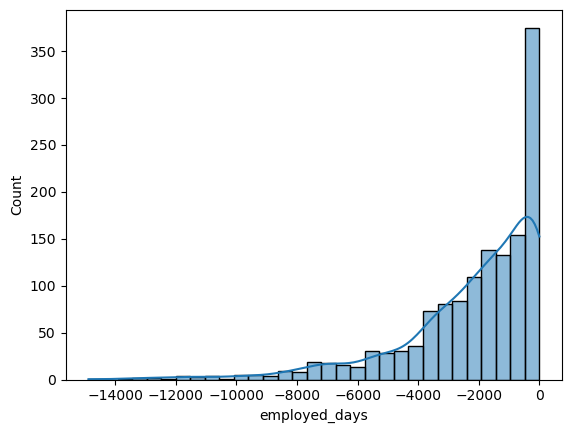

In [49]:
sns.histplot(df.employed_days, kde = True)
plt.show()

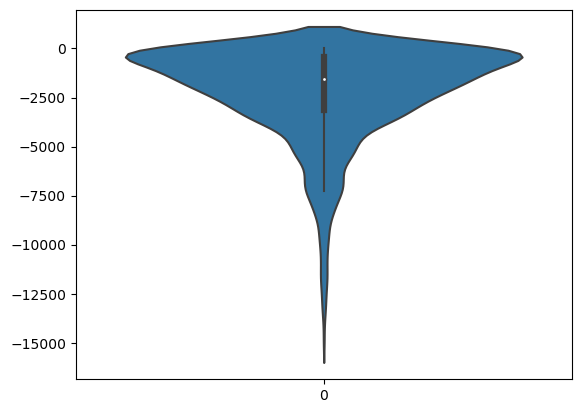

In [50]:
sns.violinplot(df.employed_days)

plt.show()

In [51]:
df['employed_days'].skew()

-1.7526052564513552

after converting all value for employed_dys to 1 then it got highly left skewed.

**Conversion:**
- We convert employed_days into a years_of_experience by dividing 365 (a total numbers of days in a year) and make it positive integer (as experience can not be negative value and 0 will be considered as years of experience less than one year)

In [52]:
df['years_of_experience'] = np.ceil((df['employed_days']/(365*-1)))


In [53]:
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,family_members,label,years_of_experience
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,1,0,0,0,2,1,-0.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,2,1,2.0
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0


In [54]:
df['years_of_experience'].describe()

count    1386.000000
mean        6.420635
std         6.609028
min        -0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        41.000000
Name: years_of_experience, dtype: float64

In [55]:
df['years_of_experience'].skew()

1.6850959830796006

**Analysing Birthday _count numerical columns**

<Axes: xlabel='birthday_count', ylabel='Count'>

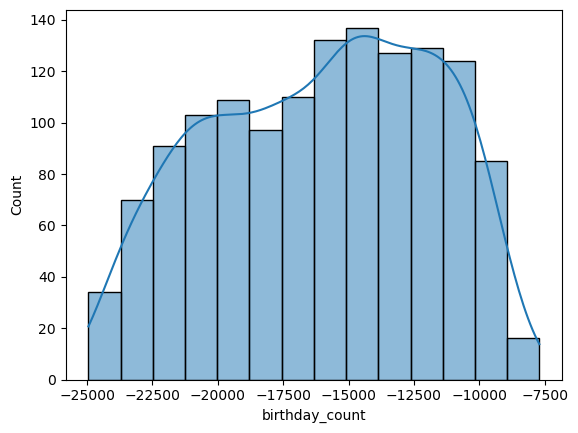

In [56]:
sns.histplot(df['birthday_count'], kde = True)

<Axes: >

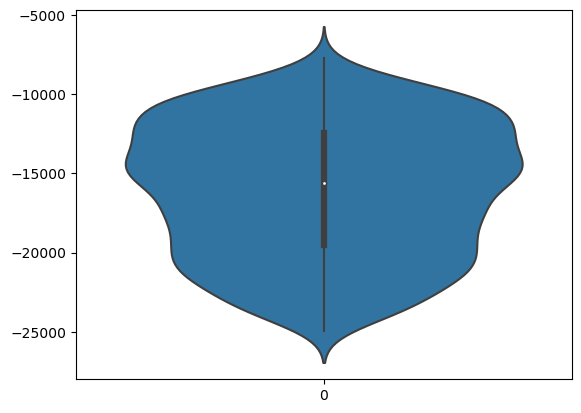

In [57]:
sns.violinplot(df['birthday_count'])

In [58]:
df['birthday_count'].describe()

count     1364.000000
mean    -16033.953812
std       4216.837346
min     -24946.000000
25%     -19543.000000
50%     -15611.500000
75%     -12445.000000
max      -7705.000000
Name: birthday_count, dtype: float64

In [59]:
#to check which one will be better for the replacing the column Birthday_count
df['age'] = np.ceil(df['birthday_count']/(365*-1))

In [60]:
df['age'].describe()

count    1364.000000
mean       44.414223
std        11.551313
min        22.000000
25%        35.000000
50%        43.000000
75%        54.000000
max        69.000000
Name: age, dtype: float64

In [61]:
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,family_members,label,years_of_experience,age
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,1,0,0,0,2,1,-0.0,52.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0,38.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,2,1,2.0,NaN
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0,38.0
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0,38.0


**after Feature Engineering on Employed Days, it has become highly left skewed so that means to get into Normal distribution we need to do some Transformation for furthure analysis.**


**after applying the Feature Engineering on the columns lets check their skewness with new feature and old one**

In [62]:
print('old one (birthday_count) : ' ,df['birthday_count'].skew() , 'new_feature (age): ', df['age'].skew())

print('old one (employed_days): ', df['employed_days'].skew(), 'new_feature (years_of_experience):',df['years_of_experience'].skew())


old one (birthday_count) :  -0.17739196901124044 new_feature (age):  0.1787029397358223
old one (employed_days):  -1.7526052564513552 new_feature (years_of_experience): 1.6850959830796006


**not a big difference between skewness of old one and new one so we can drop the old ones in order to avoid the multi-colinearity**

In [63]:
plt.figure(figsize = (7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

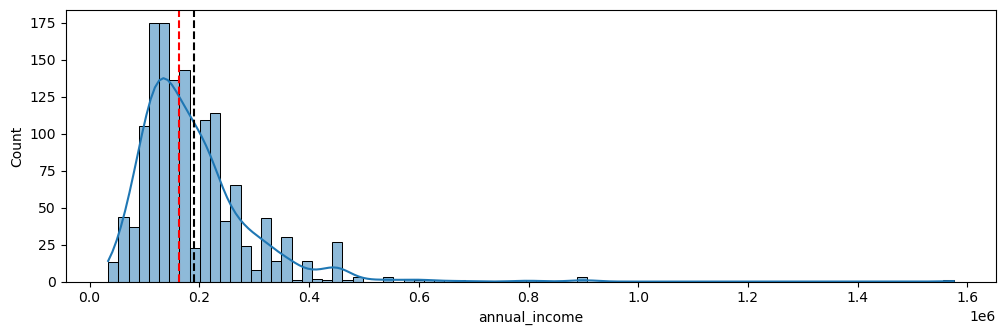

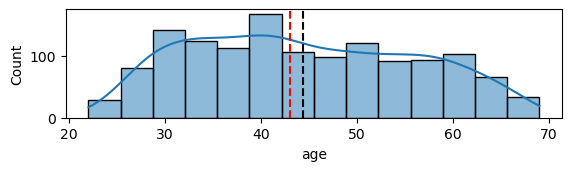

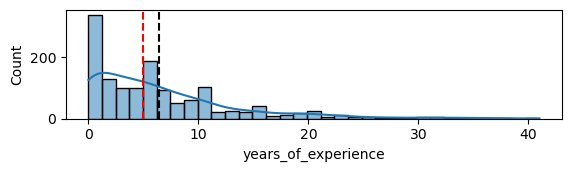

In [64]:
cols1 = ['annual_income', 'age', 'years_of_experience']

plt.figure(figsize = (12,12))
for i in enumerate(cols1):
    plt.subplot(3,1,i[0]+1)
    ax = sns.histplot(x = i[1],data = df, kde = True)
    ax.axvline(df[i[1]].mean(), c= 'black', ls = '--')
    ax.axvline(df[i[1]].median(), c= 'r', ls = '--')

    plt.show()

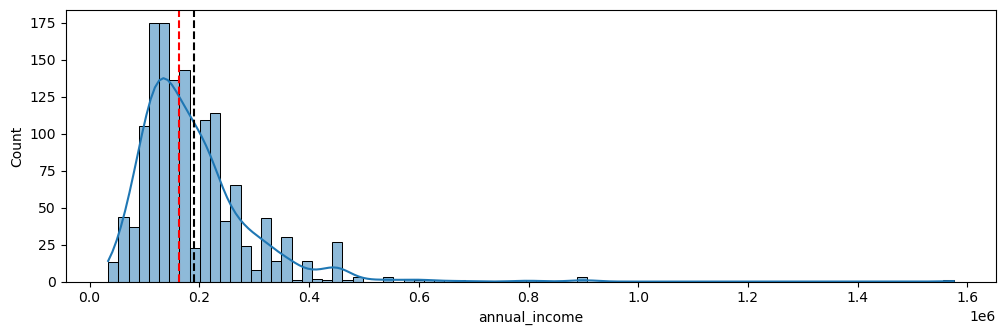

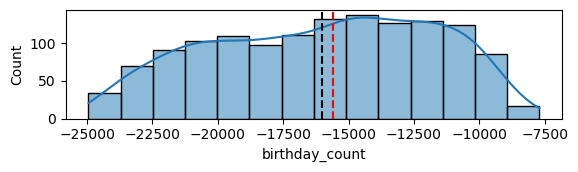

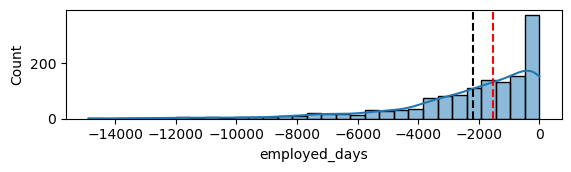

In [65]:
cols2 = ['annual_income', 'birthday_count', 'employed_days']

plt.figure(figsize = (12,12))
for i in enumerate(cols2):
    plt.subplot(3,1,i[0]+1)
    ax = sns.histplot(x = i[1],data = df, kde = True)
    ax.axvline(df[i[1]].mean(), c= 'black', ls = '--')
    ax.axvline(df[i[1]].median(), c= 'r', ls = '--')

    plt.show()

In [66]:
df.head()

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,work_phone,phone,email_id,family_members,label,years_of_experience,age
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,1,0,0,0,2,1,-0.0,52.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0,38.0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,2,1,2.0,NaN
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0,38.0
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,2,1,2.0,38.0


[Text(0, 0, '96'),
 Text(0, 0, '30'),
 Text(0, 0, '10'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

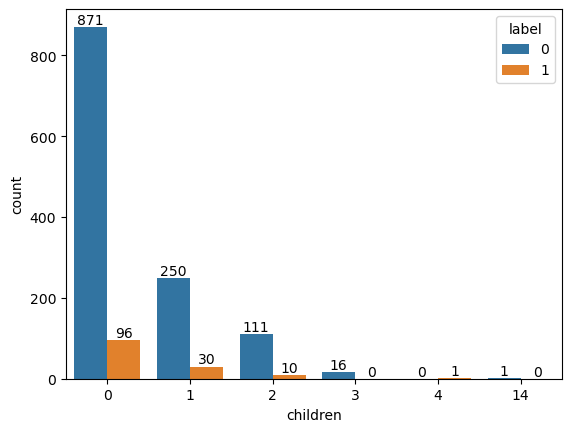

In [67]:
plt1 = sns.countplot(x = 'children', data = df, hue = 'label')
plt.bar_label(plt1.containers[0])
plt.bar_label(plt1.containers[1])

[Text(0, 0, '30'),
 Text(0, 0, '74'),
 Text(0, 0, '23'),
 Text(0, 0, '9'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

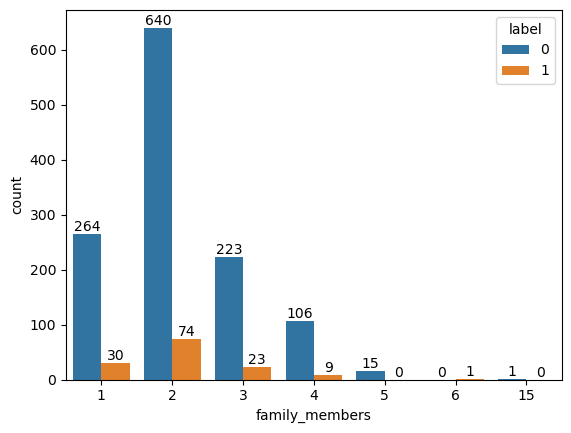

In [68]:
plt2 = sns.countplot(x = 'family_members', data = df, hue = 'label')
plt.bar_label(plt2.containers[0])
plt.bar_label(plt2.containers[1])

Observation:
- Extreme customers are having No Child.
- large nos. of customers are only having 2 Family members (so that it can be assumed more couple with no child are present in dataset)

<Axes: xlabel='family_members', ylabel='children'>

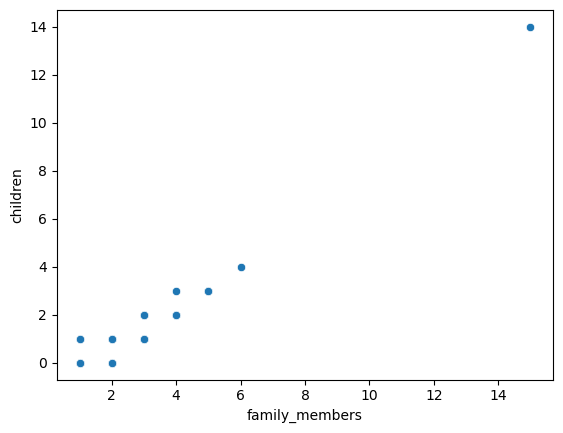

In [69]:
sns.scatterplot(data = df, y = 'children', x='family_members')

<Axes: >

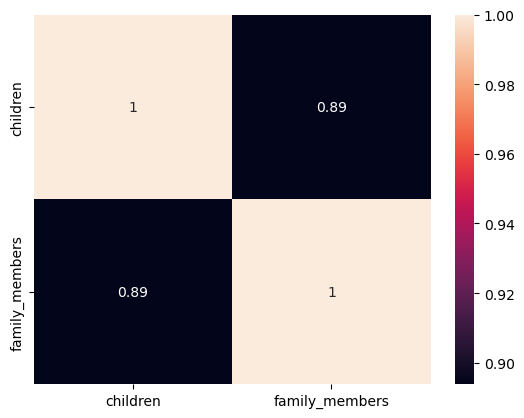

In [70]:
corr1 = df[['children', 'family_members']].corr()
sns.heatmap(corr1, annot = True)

In [71]:
# to droping all the columns
# birthday count and employed_days would be dropped
# children and family members one will be dropped out


- to droping all the columns which has influenced on one another
- birthday count and employed_days would be dropped.
- out of children and family members one columns **children** will be dropped for furthure modification.


In [72]:
df.drop(columns = {'birthday_count', 'employed_days', 'children'}, inplace = True)

In [73]:
df.head()

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,label,years_of_experience,age
0,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,2,1,-0.0,52.0
1,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,2.0,38.0
2,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,2.0,NaN
3,F,Y,N,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,1,2.0,38.0
5,NaN,Y,N,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,0,2,1,2.0,38.0


We will split the dataset into dependent and independent variable with which the data leakage can be avoided and it will be feasible to do furthure Model Building.

In [74]:
# Splitting the dataset to avoid data leakage
X = df.drop(columns = 'label')
y = df['label']

In [75]:
# Train_test_split

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [76]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((970, 14), (416, 14), (970,), (416,))

In [77]:
X_train_missing = X_train.isna().mean()*100
X_train_missing.sort_values(ascending = False)

annual_income          1.546392
age                    1.546392
gender                 0.515464
car_owner              0.000000
propert_owner          0.000000
type_income            0.000000
education              0.000000
marital_status         0.000000
housing_type           0.000000
work_phone             0.000000
phone                  0.000000
email_id               0.000000
family_members         0.000000
years_of_experience    0.000000
dtype: float64

In [78]:
X_test_missing = X_test.isna().mean()*100
X_test_missing.sort_values(ascending = False)

annual_income          1.923077
age                    1.682692
gender                 0.480769
car_owner              0.000000
propert_owner          0.000000
type_income            0.000000
education              0.000000
marital_status         0.000000
housing_type           0.000000
work_phone             0.000000
phone                  0.000000
email_id               0.000000
family_members         0.000000
years_of_experience    0.000000
dtype: float64

we can identify the missing values into train and test data which are less than 2% in both of the dataset so here Simple imputation Techniques can be applied to fill the missing values.

We will fill categorical feature "gender" with **Mode**, numerical features "age" with **mean becaue of normal distribution** and "annual_income" with **median values because of skewness (right/left)** of respective columns.

In [79]:
X_train['gender']=X_train['gender'].fillna(X_train['gender'].mode()[0])

In [80]:
X_train['age']=X_train['age'].fillna(X_train['age'].mean())

In [81]:
X_train['annual_income']=X_train['annual_income'].fillna(X_train['annual_income'].median())

In [82]:
X_train.isna().sum()

gender                 0
car_owner              0
propert_owner          0
annual_income          0
type_income            0
education              0
marital_status         0
housing_type           0
work_phone             0
phone                  0
email_id               0
family_members         0
years_of_experience    0
age                    0
dtype: int64

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 570 to 935
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               970 non-null    category
 1   car_owner            970 non-null    category
 2   propert_owner        970 non-null    category
 3   annual_income        970 non-null    float64 
 4   type_income          970 non-null    category
 5   education            970 non-null    category
 6   marital_status       970 non-null    category
 7   housing_type         970 non-null    category
 8   work_phone           970 non-null    int64   
 9   phone                970 non-null    int64   
 10  email_id             970 non-null    int64   
 11  family_members       970 non-null    int64   
 12  years_of_experience  970 non-null    float64 
 13  age                  970 non-null    float64 
dtypes: category(7), float64(3), int64(4)
memory usage: 68.4 KB


In [84]:
X_test['gender']=X_test['gender'].fillna(X_test['gender'].mode()[0])

In [85]:
X_test['age']=X_test['age'].fillna(X_test['age'].mean())

In [86]:
X_test['annual_income']=X_test['annual_income'].fillna(X_test['annual_income'].median())

In [87]:
X_test.isna().sum()

gender                 0
car_owner              0
propert_owner          0
annual_income          0
type_income            0
education              0
marital_status         0
housing_type           0
work_phone             0
phone                  0
email_id               0
family_members         0
years_of_experience    0
age                    0
dtype: int64

In [88]:
df_train = pd.concat([X_train,y_train], axis = 1)
df_train

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age,label
570,F,N,Y,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,2,13.0,42.0,0
1187,M,N,Y,292500.0,State servant,Higher education,Married,House / apartment,0,0,1,3,10.0,47.0,0
783,F,Y,N,193500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2,25.0,58.0,0
9,M,Y,Y,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,1,1,3,2.0,50.0,1
94,M,N,Y,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,0,3,6.0,35.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,F,N,Y,202500.0,Working,Higher education,Married,House / apartment,0,0,0,2,5.0,30.0,0
92,M,Y,Y,315000.0,Commercial associate,Higher education,Married,House / apartment,0,0,0,2,4.0,52.0,1
655,M,N,Y,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0,0,0,1,2.0,28.0,0
1519,F,N,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,5,11.0,36.0,0


In [89]:
df_test = pd.concat([X_test,y_test], axis = 1)
df_test

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age,label
503,F,N,N,144000.0,Working,Secondary / secondary special,Married,House / apartment,0,1,0,2,6.0,45.224939,0
210,M,N,Y,234000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,3,5.0,33.000000,0
1169,F,N,Y,67500.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,0,3,9.0,38.000000,0
514,F,Y,Y,225000.0,Working,Higher education,Single / not married,House / apartment,0,1,1,1,2.0,27.000000,0
176,M,Y,N,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,2,7.0,49.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,F,N,N,112500.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,3,7.0,44.000000,0
925,F,N,N,112500.0,State servant,Secondary / secondary special,Widow,House / apartment,1,0,0,1,15.0,53.000000,0
155,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,3,3.0,45.000000,1
1077,F,N,N,202500.0,Pensioner,Higher education,Single / not married,House / apartment,0,0,0,1,-0.0,64.000000,0


In [90]:
df_final_sql = pd.concat([df_train,df_test], axis = 0).sort_index()
df_final_sql

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age,label
0,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,2,-0.0,52.000000,1
1,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,2.0,38.000000,1
2,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,2.0,45.224939,1
3,F,Y,N,162000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,2.0,38.000000,1
5,F,Y,N,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,0,2,2.0,38.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,360000.0,State servant,Secondary / secondary special,Married,House / apartment,0,1,0,3,10.0,31.000000,0
1543,F,N,Y,162000.0,Commercial associate,Higher education,Married,House / apartment,0,0,0,2,6.0,33.000000,0
1544,F,N,N,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,0,0,0,1,4.0,29.000000,0
1546,M,Y,N,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,2,2.0,42.000000,0


In [91]:
df_final = df_final_sql.to_csv('credit_data_clean.csv', index = True)

In [92]:
df_final_excel = df_final_sql.to_excel('credit_data_clean.xlsx', index = True)

In [93]:
df_final_sql = df # rename again to df

In [94]:
X_train.head()

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age
570,F,N,Y,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,2,13.0,42.0
1187,M,N,Y,292500.0,State servant,Higher education,Married,House / apartment,0,0,1,3,10.0,47.0
783,F,Y,N,193500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2,25.0,58.0
9,M,Y,Y,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,1,1,3,2.0,50.0
94,M,N,Y,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,0,3,6.0,35.0


Encoding the Categorical Features:

- Ordinal Encoding : diff categories of Feature will be encoded order wise and as per order the numbers will be assigned to different categories of features.
- Label Encoding = unique integer will be assigned to each category in feature

In [95]:
list(X_train.education.unique())

['Secondary / secondary special',
 'Higher education',
 'Lower secondary',
 'Incomplete higher',
 'Academic degree']

In [96]:
# Order of Education is given to list so it will be easier for Ordinal encoding to assgin orders
edu_cat =['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']
edu_cat

['Lower secondary',
 'Secondary / secondary special',
 'Incomplete higher',
 'Higher education',
 'Academic degree']

In [97]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ordinal = OrdinalEncoder(categories=[edu_cat])

In [98]:
ordinal

OrdinalEncoder(categories=[['Lower secondary', 'Secondary / secondary special',
                            'Incomplete higher', 'Higher education',
                            'Academic degree']])

In [99]:
X_train['education'] = ordinal.fit_transform(X_train[['education']])

In [100]:
X_train['education'].head()

570     1.0
1187    3.0
783     1.0
9       1.0
94      1.0
Name: education, dtype: float64

In [101]:
ordinal.inverse_transform([[0]])

array([['Lower secondary']], dtype=object)

In [102]:
X_test['education'] = ordinal.transform(X_test[['education']])

In [103]:
cat_cols.pop()

'label'

In [104]:
X_train[cat_cols]

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id
570,F,N,Y,Commercial associate,1.0,Married,House / apartment,0,0,0
1187,M,N,Y,State servant,3.0,Married,House / apartment,0,0,1
783,F,Y,N,Working,1.0,Married,House / apartment,0,0,0
9,M,Y,Y,Pensioner,1.0,Married,House / apartment,0,1,1
94,M,N,Y,Commercial associate,1.0,Civil marriage,House / apartment,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1058,F,N,Y,Working,3.0,Married,House / apartment,0,0,0
92,M,Y,Y,Commercial associate,3.0,Married,House / apartment,0,0,0
655,M,N,Y,Working,1.0,Single / not married,House / apartment,0,0,0
1519,F,N,Y,Working,1.0,Married,House / apartment,0,0,0


In [105]:
cat_cols_encode = ['gender','car_owner', 'propert_owner', 'type_income', 'marital_status', 'housing_type']
cat_cols_encode

['gender',
 'car_owner',
 'propert_owner',
 'type_income',
 'marital_status',
 'housing_type']

In [106]:
label = LabelEncoder()
label

LabelEncoder()

In [107]:
for i in cat_cols_encode:
  X_train[i] = label.fit_transform(X_train[i])

In [108]:
X_train.head()

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age
570,0,0,1,157500.0,0,1.0,1,1,0,0,0,2,13.0,42.0
1187,1,0,1,292500.0,2,3.0,1,1,0,0,1,3,10.0,47.0
783,0,1,0,193500.0,3,1.0,1,1,0,0,0,2,25.0,58.0
9,1,1,1,450000.0,1,1.0,1,1,0,1,1,3,2.0,50.0
94,1,0,1,126000.0,0,1.0,0,1,0,0,0,3,6.0,35.0


In [109]:
for i in cat_cols_encode:
  X_test[i] = label.fit_transform(X_test[i])

In [110]:
X_test.head()

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age
503,0,0,0,144000.0,3,1.0,1,1,0,1,0,2,6.0,45.224939
210,1,0,1,234000.0,3,1.0,1,1,0,0,0,3,5.0,33.000000
1169,0,0,1,67500.0,3,1.0,2,1,1,0,0,3,9.0,38.000000
514,0,1,1,225000.0,3,3.0,3,1,0,1,1,1,2.0,27.000000
176,1,1,0,225000.0,0,1.0,1,1,0,0,0,2,7.0,49.000000


**Outliers Treatment and Transformation**

In [111]:
X_train

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age
570,0,0,1,157500.0,0,1.0,1,1,0,0,0,2,13.0,42.0
1187,1,0,1,292500.0,2,3.0,1,1,0,0,1,3,10.0,47.0
783,0,1,0,193500.0,3,1.0,1,1,0,0,0,2,25.0,58.0
9,1,1,1,450000.0,1,1.0,1,1,0,1,1,3,2.0,50.0
94,1,0,1,126000.0,0,1.0,0,1,0,0,0,3,6.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,1,202500.0,3,3.0,1,1,0,0,0,2,5.0,30.0
92,1,1,1,315000.0,0,3.0,1,1,0,0,0,2,4.0,52.0
655,1,0,1,225000.0,3,1.0,3,1,0,0,0,1,2.0,28.0
1519,0,0,1,112500.0,3,1.0,1,1,0,0,0,5,11.0,36.0


<Axes: xlabel='annual_income', ylabel='Count'>

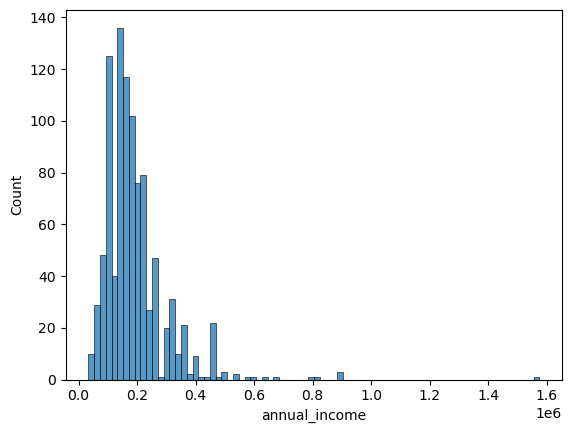

In [112]:
sns.histplot(X_train.annual_income)

In [113]:
X_train['annual_income_log'] = np.log(X_train['annual_income'])

In [114]:
X_train[['annual_income_log', 'annual_income']].describe()

,annual_income_log,annual_income
count,970.000000,9.700000e+02
mean,12.045154,1.922145e+05
std,0.477832,1.125947e+05
min,10.426736,3.375000e+04
25%,11.744037,1.260000e+05
50%,11.995352,1.620000e+05
75%,12.323856,2.250000e+05
max,14.269766,1.575000e+06


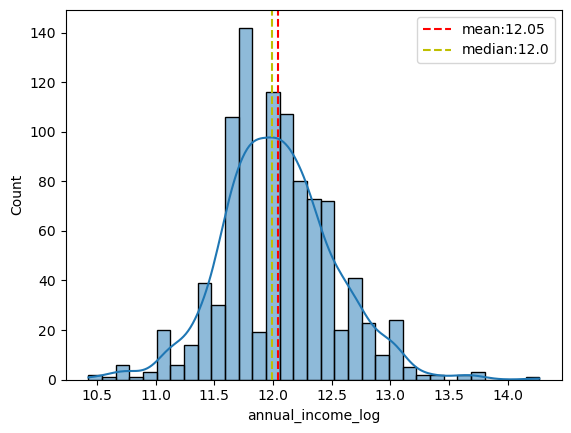

In [115]:
sns.histplot(X_train.annual_income_log, kde = True)
plt.axvline(X_train.annual_income_log.mean(), color = 'r',linestyle= '--', linewidth=1.5, label=f"mean:{round(np.mean(X_train.annual_income_log),2)}")
plt.axvline(X_train.annual_income_log.median(), color = 'y', linestyle= '--', linewidth=1.5, label=f"median:{round(np.median(X_train.annual_income_log),2)}")
plt.legend()
plt.show()

In [116]:
X_train.annual_income_log.skew() #got normal Distribution

0.266828494273183

In [117]:
X_test['annual_income_log'] = np.log(X_test['annual_income'])

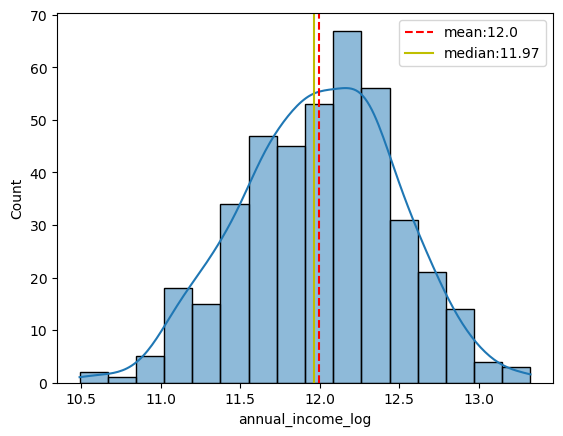

In [118]:
sns.histplot(X_test['annual_income_log'], kde = True)
plt.axvline(X_test.annual_income_log.mean(), color = 'r', linestyle= '--', linewidth=1.5, label=f"mean:{round(np.mean(X_test.annual_income_log),2)}")
plt.axvline(X_test.annual_income_log.median(), color = 'y', linewidth=1.5, label=f"median:{round(np.median(X_test.annual_income_log),2)}")
plt.legend()
plt.show()

In [119]:
X_test.annual_income_log.skew() # got normal distribution

-0.1360770356029042

<Axes: xlabel='years_of_experience', ylabel='Count'>

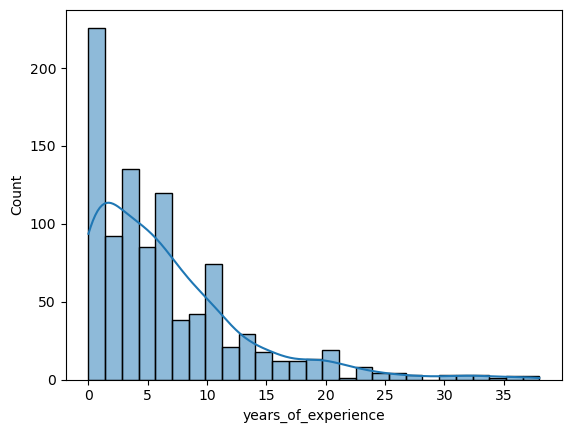

In [120]:
sns.histplot(X_train.years_of_experience, kde = True)

In [121]:
X_train.years_of_experience.skew() #right skewed

1.690615483572511

In [122]:
X_train['years_of_experience_log'] = np.log(X_train['years_of_experience']+1)

In [123]:
X_train['years_of_experience_sqrt'] = np.sqrt(X_train['years_of_experience'])

In [124]:
X_train[['years_of_experience_log','years_of_experience_sqrt']].describe()

,years_of_experience_log,years_of_experience_sqrt
count,970.000000,970.000000
mean,1.616171,2.154472
std,0.956846,1.363502
min,0.000000,-0.000000
25%,1.098612,1.414214
50%,1.791759,2.236068
75%,2.302585,3.000000
max,3.663562,6.164414


In [125]:
X_train['years_of_experience_log'].skew()

-0.30309114700603673

In [126]:
X_train['years_of_experience_sqrt'].skew() #got normal Distribution

0.137741897291309

We have transformed the annual_income with log transform and  years_of_experience with SQRT Transform.

**(after adding one to log transform which is not giving feasible skewness so we can work with SQRT Transform for years_of_experience).**

In [127]:
X_train.drop(columns = {'years_of_experience_log'}, inplace = True)

In [128]:
X_train

,gender,car_owner,propert_owner,annual_income,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,years_of_experience,age,annual_income_log,years_of_experience_sqrt
570,0,0,1,157500.0,0,1.0,1,1,0,0,0,2,13.0,42.0,11.967181,3.605551
1187,1,0,1,292500.0,2,3.0,1,1,0,0,1,3,10.0,47.0,12.586220,3.162278
783,0,1,0,193500.0,3,1.0,1,1,0,0,0,2,25.0,58.0,12.173033,5.000000
9,1,1,1,450000.0,1,1.0,1,1,0,1,1,3,2.0,50.0,13.017003,1.414214
94,1,0,1,126000.0,0,1.0,0,1,0,0,0,3,6.0,35.0,11.744037,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,1,202500.0,3,3.0,1,1,0,0,0,2,5.0,30.0,12.218495,2.236068
92,1,1,1,315000.0,0,3.0,1,1,0,0,0,2,4.0,52.0,12.660328,2.000000
655,1,0,1,225000.0,3,1.0,3,1,0,0,0,1,2.0,28.0,12.323856,1.414214
1519,0,0,1,112500.0,3,1.0,1,1,0,0,0,5,11.0,36.0,11.630709,3.316625


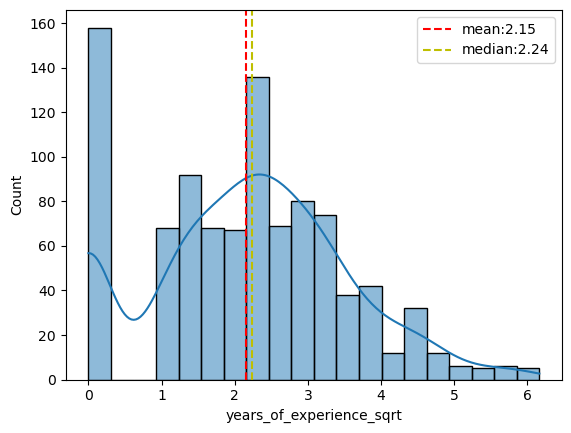

In [129]:
sns.histplot(X_train.years_of_experience_sqrt, kde = True)
plt.axvline(X_train.years_of_experience_sqrt.mean(), color = 'r',linestyle= '--', linewidth=1.5, label=f"mean:{round(np.mean(X_train.years_of_experience_sqrt),2)}")
plt.axvline(X_train.years_of_experience_sqrt.median(), color = 'y', linestyle= '--', linewidth=1.5, label=f"median:{round(np.median(X_train.years_of_experience_sqrt),2)}")
plt.legend()
plt.show()

In [130]:
X_test['years_of_experience_sqrt'] = np.sqrt(X_test['years_of_experience'])

In [131]:
X_test['years_of_experience_sqrt'].skew() #got normal Distribution

0.20577376880950726

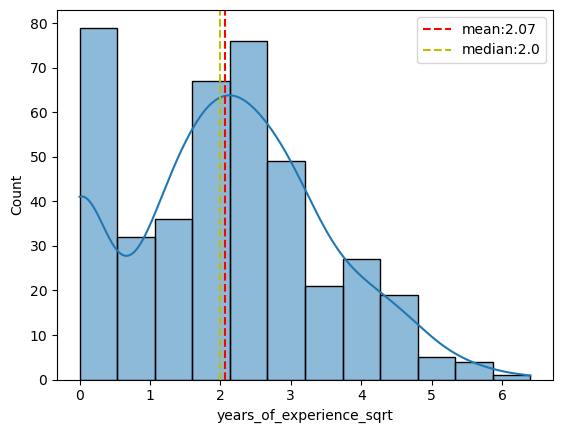

In [132]:
sns.histplot(X_test.years_of_experience_sqrt, kde = True)
plt.axvline(X_test.years_of_experience_sqrt.mean(), color = 'r',linestyle= '--', linewidth=1.5, label=f"mean:{round(np.mean(X_test.years_of_experience_sqrt),2)}")
plt.axvline(X_test.years_of_experience_sqrt.median(), color = 'y', linestyle= '--', linewidth=1.5, label=f"median:{round(np.median(X_test.years_of_experience_sqrt),2)}")
plt.legend()
plt.show()

In [133]:
X_train.drop(columns = {'annual_income', 'years_of_experience'}, inplace = True)
X_train

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
570,0,0,1,0,1.0,1,1,0,0,0,2,42.0,11.967181,3.605551
1187,1,0,1,2,3.0,1,1,0,0,1,3,47.0,12.586220,3.162278
783,0,1,0,3,1.0,1,1,0,0,0,2,58.0,12.173033,5.000000
9,1,1,1,1,1.0,1,1,0,1,1,3,50.0,13.017003,1.414214
94,1,0,1,0,1.0,0,1,0,0,0,3,35.0,11.744037,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,1,3,3.0,1,1,0,0,0,2,30.0,12.218495,2.236068
92,1,1,1,0,3.0,1,1,0,0,0,2,52.0,12.660328,2.000000
655,1,0,1,3,1.0,3,1,0,0,0,1,28.0,12.323856,1.414214
1519,0,0,1,3,1.0,1,1,0,0,0,5,36.0,11.630709,3.316625


In [134]:
X_test.drop(columns = {'annual_income', 'years_of_experience'}, inplace = True)
X_test

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
503,0,0,0,3,1.0,1,1,0,1,0,2,45.224939,11.877569,2.449490
210,1,0,1,3,1.0,1,1,0,0,0,3,33.000000,12.363076,2.236068
1169,0,0,1,3,1.0,2,1,1,0,0,3,38.000000,11.119883,3.000000
514,0,1,1,3,3.0,3,1,0,1,1,1,27.000000,12.323856,1.414214
176,1,1,0,0,1.0,1,1,0,0,0,2,49.000000,12.323856,2.645751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0,0,0,0,3.0,1,1,1,1,0,3,44.000000,11.630709,2.645751
925,0,0,0,2,1.0,4,1,1,0,0,1,53.000000,11.630709,3.872983
155,1,1,1,3,1.0,1,1,1,1,0,3,45.000000,11.630709,1.732051
1077,0,0,0,1,3.0,3,1,0,0,0,1,64.000000,12.218495,-0.000000


In [135]:
y_train.value_counts()

0    878
1     92
Name: label, dtype: int64

### **Imbalanced Data Handling**

Based on Sample data for training we can identify the Imbalanced data for Classes which needs to be predicted so we need to use Sampling Techniques for the imbalanced data and try to get the balanced data for model creation and prediction.

We have two main Resampling Techniques:
1. Undersampling : It reduces the samples in majority class to balance the sample in minority class.
Disadvantage : it losses the useful information from data by reducing thesamples in data.

2. Oversampling : It increase the samples in minority class to balance the sample in majority class.
Disadvantage : it can increase the overfitting since the more sample will be added in data.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class is called as the **Synthetic Minority Oversampling Technique (SMOTE Technique)**


**There are few other Technique to deal with Imbalanced data.**
1. SMOTE : Synthetic Minority Oversampling Technique
2. ADASYN: Adaptive Synthetic Sampling Approach
3. Hybridization: SMOTE + Tomek Links
4. Hybridization: SMOTE + ENN


**We will use SMOTE to create synthesized sample for minority class.**

In [136]:
X_train

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
570,0,0,1,0,1.0,1,1,0,0,0,2,42.0,11.967181,3.605551
1187,1,0,1,2,3.0,1,1,0,0,1,3,47.0,12.586220,3.162278
783,0,1,0,3,1.0,1,1,0,0,0,2,58.0,12.173033,5.000000
9,1,1,1,1,1.0,1,1,0,1,1,3,50.0,13.017003,1.414214
94,1,0,1,0,1.0,0,1,0,0,0,3,35.0,11.744037,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,1,3,3.0,1,1,0,0,0,2,30.0,12.218495,2.236068
92,1,1,1,0,3.0,1,1,0,0,0,2,52.0,12.660328,2.000000
655,1,0,1,3,1.0,3,1,0,0,0,1,28.0,12.323856,1.414214
1519,0,0,1,3,1.0,1,1,0,0,0,5,36.0,11.630709,3.316625


In [137]:
from imblearn.over_sampling import SMOTE
from collections import Counter
Counter(y_train) #counter of class before smote (oversampling)

Counter({0: 878, 1: 92})

In [138]:
smt = SMOTE(random_state= 10, k_neighbors=3, )
smt

SMOTE(k_neighbors=3, random_state=10)

In [139]:
X_train_sm, y_train_sm = smt.fit_resample(X_train,y_train)

In [140]:
Counter(y_train_sm) #counter of class after smote (oversampling)

Counter({0: 878, 1: 878})

In [141]:
X_train_sm.shape , y_train_sm.shape

((1756, 14), (1756,))

In [142]:
X_train_sm

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
0,0,0,1,0,1.000000,1,1,0,0,0,2,42.000000,11.967181,3.605551
1,1,0,1,2,3.000000,1,1,0,0,1,3,47.000000,12.586220,3.162278
2,0,1,0,3,1.000000,1,1,0,0,0,2,58.000000,12.173033,5.000000
3,1,1,1,1,1.000000,1,1,0,1,1,3,50.000000,13.017003,1.414214
4,1,0,1,0,1.000000,0,1,0,0,0,3,35.000000,11.744037,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,0,0,0,1,1.000000,1,1,0,0,0,2,60.633206,11.928317,0.000000
1752,0,0,1,1,1.505593,1,1,0,0,0,2,59.494407,11.493003,0.000000
1753,0,0,0,3,1.000000,2,1,0,0,0,2,37.944665,12.177062,1.000000
1754,0,0,1,1,3.000000,2,1,0,0,0,1,68.000000,11.502875,0.000000



### **Feature Scalling**

Before We proceed for Model Building our data should be Scaled in such way that all independent Features should have equavivalent weight and scale for Model to increase its accuracy and prediction.

Feature Scalling can be done by two methods:
1. Standard Scalling: (values will be scalled between -3 to 3)
2. Min-max Scalling: (values will be scalled between 0 to 1)

In [143]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
ss

StandardScaler()

In [144]:
cols_for_scalling =['age','annual_income_log', 'years_of_experience_sqrt']

In [145]:
X_train_sm.head()

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
0,0,0,1,0,1.0,1,1,0,0,0,2,42.0,11.967181,3.605551
1,1,0,1,2,3.0,1,1,0,0,1,3,47.0,12.586220,3.162278
2,0,1,0,3,1.0,1,1,0,0,0,2,58.0,12.173033,5.000000
3,1,1,1,1,1.0,1,1,0,1,1,3,50.0,13.017003,1.414214
4,1,0,1,0,1.0,0,1,0,0,0,3,35.0,11.744037,2.449490


In [146]:
X_train_sm[cols_for_scalling] = pd.DataFrame(ss.fit_transform(X_train_sm[cols_for_scalling]),
                             columns = cols_for_scalling, index = X_train_sm.index)

In [147]:
X_train_sm.head()

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
0,0,0,1,0,1.0,1,1,0,0,0,2,-0.236090,-0.180703,1.280886
1,1,0,1,2,3.0,1,1,0,0,1,3,0.205680,1.172337,0.928924
2,0,1,0,3,1.0,1,1,0,0,0,2,1.177572,0.269230,2.388087
3,1,1,1,1,1.0,1,1,0,1,1,3,0.470741,2.113903,-0.459049
4,1,0,1,0,1.0,0,1,0,0,0,3,-0.854567,-0.668430,0.362967


In [148]:
X_test[cols_for_scalling] = pd.DataFrame(ss.transform(X_test[cols_for_scalling]),
                             columns = cols_for_scalling, index = X_test.index)

In [149]:
X_test.head()

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
503,0,0,0,3,1.0,1,1,0,1,0,2,0.048846,-0.376569,0.362967
210,1,0,1,3,1.0,1,1,0,0,0,3,-1.031274,0.684610,0.193509
1169,0,0,1,3,1.0,2,1,1,0,0,3,-0.589505,-2.032650,0.800075
514,0,1,1,3,3.0,3,1,0,1,1,1,-1.561398,0.598885,-0.459049
176,1,1,0,0,1.0,1,1,0,0,0,2,0.382387,0.598885,0.518800


In [150]:
X_test[cols_for_scalling].describe()

,age,annual_income_log,years_of_experience_sqrt
count,416.000000,416.000000,416.000000
mean,0.048846,-0.118956,0.058956
std,1.019374,1.055785,1.114965
min,-1.826459,-3.406606,-1.581942
25%,-0.854567,-0.916134,-0.787936
50%,-0.059382,-0.180703,0.006069
75%,0.934599,0.598885,0.800075
max,2.149465,2.785976,3.502175


In [151]:
X_train_sm

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
0,0,0,1,0,1.000000,1,1,0,0,0,2,-0.236090,-0.180703,1.280886
1,1,0,1,2,3.000000,1,1,0,0,1,3,0.205680,1.172337,0.928924
2,0,1,0,3,1.000000,1,1,0,0,0,2,1.177572,0.269230,2.388087
3,1,1,1,1,1.000000,1,1,0,1,1,3,0.470741,2.113903,-0.459049
4,1,0,1,0,1.000000,0,1,0,0,0,3,-0.854567,-0.668430,0.362967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,0,0,0,1,1.000000,1,1,0,0,0,2,1.410226,-0.265647,-1.581942
1752,0,0,1,1,1.505593,1,1,0,0,0,2,1.309609,-1.217117,-1.581942
1753,0,0,0,3,1.000000,2,1,0,0,0,2,-0.594394,0.278036,-0.787936
1754,0,0,1,1,3.000000,2,1,0,0,0,1,2.061111,-1.195540,-1.581942


In [152]:
X_test

,gender,car_owner,propert_owner,type_income,education,marital_status,housing_type,work_phone,phone,email_id,family_members,age,annual_income_log,years_of_experience_sqrt
503,0,0,0,3,1.0,1,1,0,1,0,2,0.048846,-0.376569,0.362967
210,1,0,1,3,1.0,1,1,0,0,0,3,-1.031274,0.684610,0.193509
1169,0,0,1,3,1.0,2,1,1,0,0,3,-0.589505,-2.032650,0.800075
514,0,1,1,3,3.0,3,1,0,1,1,1,-1.561398,0.598885,-0.459049
176,1,1,0,0,1.0,1,1,0,0,0,2,0.382387,0.598885,0.518800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0,0,0,0,3.0,1,1,1,1,0,3,-0.059382,-0.916134,0.518800
925,0,0,0,2,1.0,4,1,1,0,0,1,0.735803,-0.916134,1.493229
155,1,1,1,3,1.0,1,1,1,1,0,3,0.028972,-0.916134,-0.206684
1077,0,0,0,1,3.0,3,1,0,0,0,1,1.707696,0.368597,-1.581942


In [153]:
y_train_sm

0       0
1       0
2       0
3       1
4       1
       ..
1751    1
1752    1
1753    1
1754    1
1755    1
Name: label, Length: 1756, dtype: int64

In [154]:
y_test.value_counts()

0    371
1     45
Name: label, dtype: int64

In [155]:
X_train_sm.shape, X_test.shape,y_train_sm.shape, y_test.shape

((1756, 14), (416, 14), (1756,), (416,))

## **Various Model Building, Performance Evaluation and Comparision of Decision metrics.**  

Since we are working with Classification Problem for predictiong our Target Variable. We will build 4-5 Models for Classification as below

- we will derive the Accuracy Score, Precision, Recall, F1 score, ROC-AUC score and ROC-AUC curve.
- Furthure we will do hyperparameter Tunining and compare it once again with all respected models.

- then we will compare all the Performances to derive the Best fit Model for Credit-Card-Prediction.  



We will apply 4-5 Model as per below :
1. Logistic Regression
2. Decision Tree Classifier
3. Support Vector Classifier
4. Random Forest Classifier
5. XGBoost Classifier

from all the required parameter we will try to find best fit model and try to predict to get accuracy.


**before we go ahead,we import all the required libraries and modules to work on model building and valuation.**



In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### **Model.1 Logistic Regression Model**

In [157]:
# define the model
clf1 = LogisticRegression()
clf1

LogisticRegression()

In [158]:
# fit the training data
clf1.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [159]:
# predict the testing data (X_test)
y_pred = clf1.predict(X_test)

In [160]:
# get the accuarcy by comparing the test data and predicted data
print("The Accuaracy for logistic Regression :",accuracy_score(y_test, y_pred))

The Accuaracy for logistic Regression : 0.6298076923076923


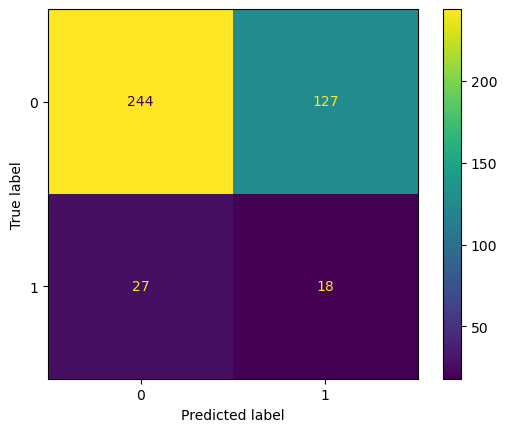

In [161]:
#Confusion matrix for the TP = True Positive, TN = True Negative, FP= False Positive, FN = false Negative
cm = confusion_matrix(y_test, y_pred, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf1.classes_)
disp.plot()
plt.show()

**Confusion Matrix gives very much high value for FP which indicates to check the Classification report and all the values for Precision, Recall and F1-Score**

**For Highly Imbalanced data we can check ROC-AUC Curve which is a performance matrix that is used for the classification problems to check various threshold settings for any Predictive Model.**



In [162]:
print("classification_report : \n", classification_report(y_test, y_pred))

classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.66      0.76       371
           1       0.12      0.40      0.19        45

    accuracy                           0.63       416
   macro avg       0.51      0.53      0.47       416
weighted avg       0.82      0.63      0.70       416



In [163]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5288409703504042


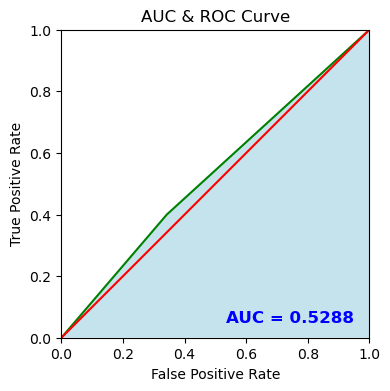

In [164]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**AUC score can be interpreted as the model’s ability to accurately classify classes on a scale from 0 to 1, where 1 is best and 0.5 is as good as random choice.**
**IF AUC is between 0.5 - 0.7 then it gives OK Performance.** 
**AUC isn’t a direct measure of model accuracy, it’s the probability that the model will assign a larger probability to a random positive example than a random negative**

**We want to increase the accuracy of model then we should try to tune the parameter of model with which the model Accuracy and AUC Score can be improved.**

### **1. Hyperparameter tuning for logistic Regression**

In [165]:
param = {'C': [0.001, 0.01, 0.1, 1, 10,15,50, 100, 1000],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga', 'sag']}



grid = GridSearchCV(clf1, param_grid = param, cv = 5, scoring = 'roc_auc')
grid


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga',
                                    'sag']},
             scoring='roc_auc')

In [166]:
grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 50, 100, 1000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga',
                                    'sag']},
             scoring='roc_auc')

In [167]:
grid.best_params_

{'C': 100, 'solver': 'liblinear'}

In [168]:
grid.best_score_

0.76072611053719

In [169]:
clf1_best = grid.best_estimator_

In [170]:
clf1_best.fit(X_train_sm, y_train_sm)

LogisticRegression(C=100, solver='liblinear')

In [171]:
y_pred= clf1_best.predict(X_test)


In [172]:
#check accuracy after the Hyperparameter tuning
print("The Accuaracy for logistic Regression :",accuracy_score(y_test, y_pred))

The Accuaracy for logistic Regression : 0.6298076923076923


In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       371
           1       0.12      0.40      0.19        45

    accuracy                           0.63       416
   macro avg       0.51      0.53      0.47       416
weighted avg       0.82      0.63      0.70       416



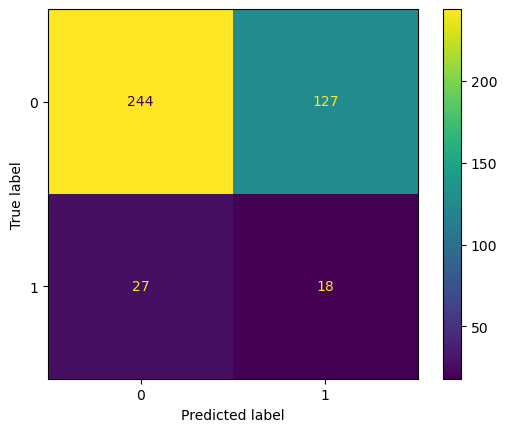

In [174]:
cm = confusion_matrix(y_test, y_pred, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf1.classes_)
disp.plot()
plt.show()

In [175]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5288409703504042


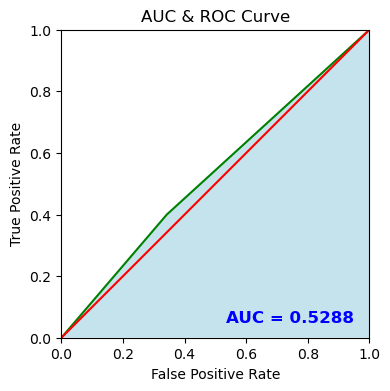

In [176]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**after the hyperparameter tuning Model has not given significant change in any of the parameter such as Accuracy and AUC-Score.**

### **Model 2:  Decision Tree Classifier**

In [177]:
# define the model
clf2 = DecisionTreeClassifier(random_state=0)
clf2

DecisionTreeClassifier(random_state=0)

In [178]:
# fit the training data
clf2.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=0)

In [179]:
#predict the testing data
y_pred = clf2.predict(X_test)

In [180]:
#get the accuracy score
accuracy_score(y_test, y_pred)

0.7980769230769231

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       371
           1       0.17      0.22      0.19        45

    accuracy                           0.80       416
   macro avg       0.54      0.55      0.54       416
weighted avg       0.82      0.80      0.81       416



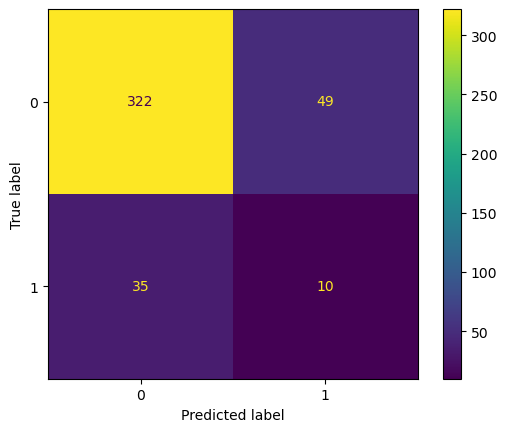

In [182]:
cm = confusion_matrix(y_test, y_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf2.classes_)
disp.plot()
plt.show()

#### **Confusion matrix for Decision Tree has comparatively given very less value of FP than the Logistic Regression which is good sign for the model.**

In [183]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5450733752620546


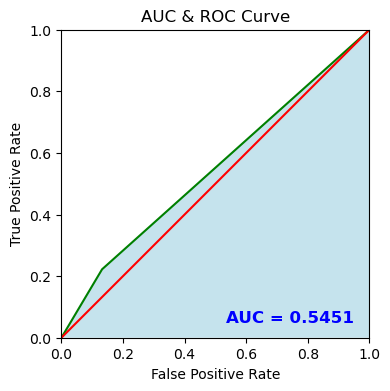

In [184]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### **1. Hyperparameter tuning for Decision Tree**

In [185]:
params = {
    'max_depth': [5,10,15,20,25,30,50,75,80,100,200,500,1000],
    'criterion': ['gini', 'entropy']}

In [186]:
grid = GridSearchCV(clf2, params, cv =5, scoring = 'roc_auc')

In [187]:
#train the model
grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 50, 75, 80, 100,
                                       200, 500, 1000]},
             scoring='roc_auc')

In [188]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [189]:
clf2_best = grid.best_estimator_

In [190]:
clf2_best.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [191]:
y_pred = clf2_best.predict(X_test)

In [192]:
#check accuracy after the Hyperparameter tuning
print("The Accuaracy for Decison Tree :",accuracy_score(y_test, y_pred))

The Accuaracy for Decison Tree : 0.8052884615384616


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       371
           1       0.19      0.24      0.21        45

    accuracy                           0.81       416
   macro avg       0.55      0.56      0.55       416
weighted avg       0.83      0.81      0.82       416



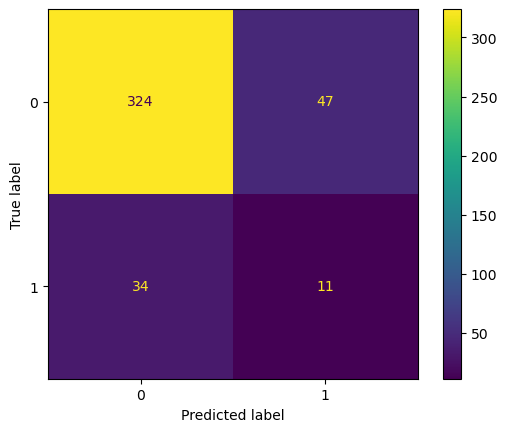

In [194]:
cm = confusion_matrix(y_test, y_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf2.classes_)
disp.plot()
plt.show()

In [195]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.558879904162923


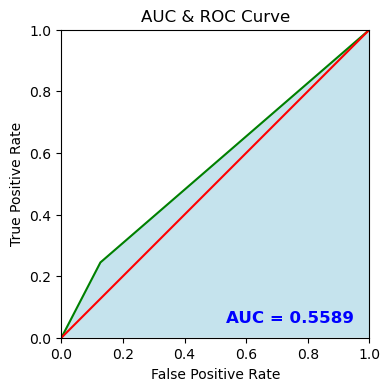

In [196]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**after Hyperparameter tuning the model has slightly improved its Accuracy and AUC-Score**  

### **Model 3:  Support Vector Classifier**

In [197]:
# define the model
clf3 = SVC(gamma=1)

In [198]:
clf3

SVC(gamma=1)

In [199]:
#fit the the training data
clf3.fit(X_train_sm, y_train_sm)


SVC(gamma=1)

In [200]:
#predict the testing data
y_pred = clf3.predict(X_test)

In [201]:
#get the accuracy score for testing and predicting data
accuracy_score(y_test, y_pred)

0.8605769230769231

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       371
           1       0.26      0.16      0.19        45

    accuracy                           0.86       416
   macro avg       0.58      0.55      0.56       416
weighted avg       0.83      0.86      0.84       416



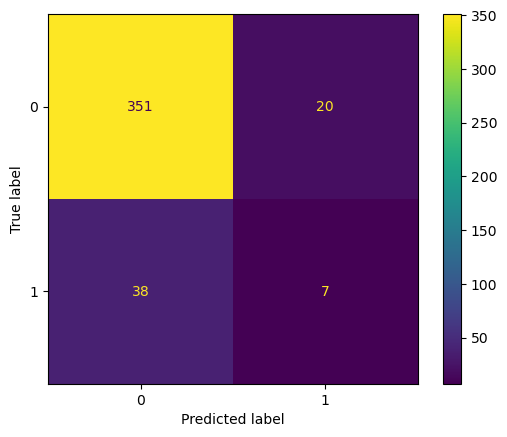

In [203]:
cm = confusion_matrix(y_test, y_pred, labels=clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf3.classes_)
disp.plot()
plt.show()

#### **confusion matrix for support vector has performed well in compariosn of Decison Tree and Logistic Regression.**
#### **The prediction for TN (True Negative) has still not improved for model.**
#### **-Very good TN and very less FP Values which itself a good sign of accuracy.**

### **- Hyperparameter tuning for Support Vector**

In [204]:
param= {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [0.1,1,10,100,500,1000],
    'gamma': ['auto'],
    'decision_function_shape': ['ovr', 'ovo']}

In [205]:
grid = RandomizedSearchCV(clf3, param, cv = 5, n_iter = 20, n_jobs = -1)
grid
#n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors

RandomizedSearchCV(cv=5, estimator=SVC(gamma=1), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 500, 1000],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'gamma': ['auto'],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [206]:
grid.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=SVC(gamma=1), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 500, 1000],
                                        'decision_function_shape': ['ovr',
                                                                    'ovo'],
                                        'gamma': ['auto'],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [207]:
grid.best_score_

0.8861337736337737

In [208]:
grid.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'decision_function_shape': 'ovo', 'C': 100}

In [209]:
clf3_best = grid.best_estimator_
clf3_best

SVC(C=100, decision_function_shape='ovo', gamma='auto')

In [210]:
clf3_best.fit(X_train_sm, y_train_sm)

SVC(C=100, decision_function_shape='ovo', gamma='auto')

In [211]:
y_pred = clf3_best.predict(X_test)

In [212]:
# Checking the Accuracy
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.7644230769230769


#### **after hyperparameter tuning accuracy has decreased.**

In [213]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       371
           1       0.14      0.22      0.17        45

    accuracy                           0.76       416
   macro avg       0.52      0.53      0.52       416
weighted avg       0.82      0.76      0.79       416



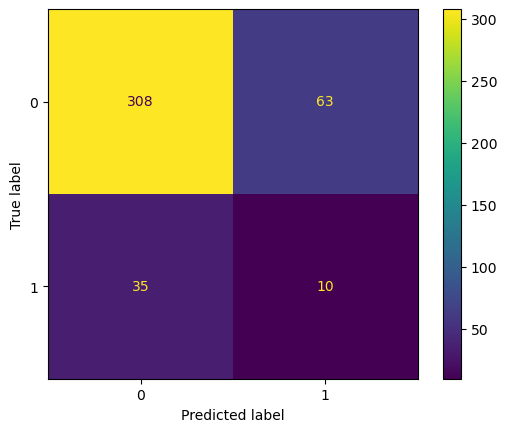

In [214]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.show()

In [215]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5262054507337527


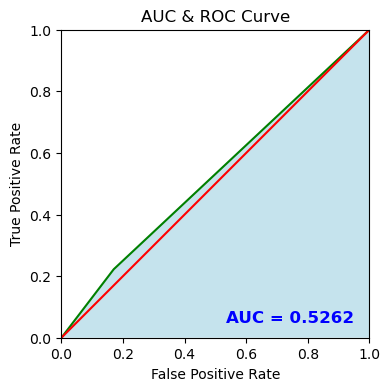

In [216]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### **- after hyper parameter tuning AUC Score has also decreased and Model Perfomance is getting worse.**
#### **- let's try another Model**

### **Model 4:  Random Forest Classifier**

In [217]:
# define the model
clf4 = RandomForestClassifier(n_estimators =500, max_depth = 50, oob_score = True, criterion = 'gini', random_state = 0)
clf4

RandomForestClassifier(max_depth=50, n_estimators=500, oob_score=True,
                       random_state=0)

In [218]:
#fit the training data
clf4.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=50, n_estimators=500, oob_score=True,
                       random_state=0)

In [219]:
y_pred = clf4.predict(X_test)

In [220]:
# Checking the Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8653846153846154


In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       371
           1       0.31      0.20      0.24        45

    accuracy                           0.87       416
   macro avg       0.61      0.57      0.58       416
weighted avg       0.84      0.87      0.85       416



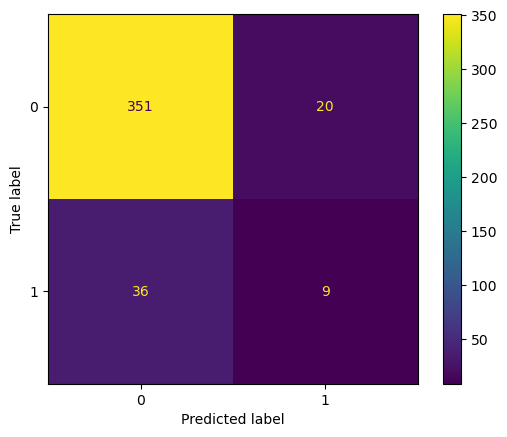

In [222]:
cm = confusion_matrix(y_test, y_pred, labels=clf4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf4.classes_)
disp.plot()
plt.show()

#### **The Accuracy has increased and the model performance has slightly imroved than the Support Vector**

In [223]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5730458221024258


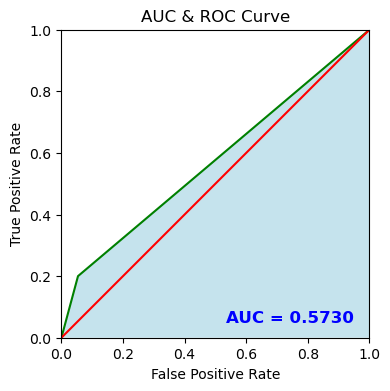

In [224]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### **- Hyperparameter tuning for Random Forest**

In [225]:

params = {
    'n_estimators' : [5,10,15,20,30,50,80,100,500,1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 12, 20, 50, 100, 500]}

In [226]:
grid = GridSearchCV(clf4, params, cv=5, n_jobs = -1, scoring ='roc_auc')
grid

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=50, n_estimators=500,
                                              oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, 20, 50, 100, 500],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 80, 100, 500,
                                          1000]},
             scoring='roc_auc')

In [227]:
grid.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=50, n_estimators=500,
                                              oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, 20, 50, 100, 500],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 80, 100, 500,
                                          1000]},
             scoring='roc_auc')

In [228]:
grid.best_score_

0.982424660566706

In [229]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 500}

In [230]:
clf4_best = grid.best_estimator_

In [231]:
clf4_best.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_depth=50, n_estimators=500, oob_score=True,
                       random_state=0)

In [232]:
y_pred = clf4_best.predict(X_test)

In [233]:
# Checking the Accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8653846153846154


In [234]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       371
           1       0.31      0.20      0.24        45

    accuracy                           0.87       416
   macro avg       0.61      0.57      0.58       416
weighted avg       0.84      0.87      0.85       416



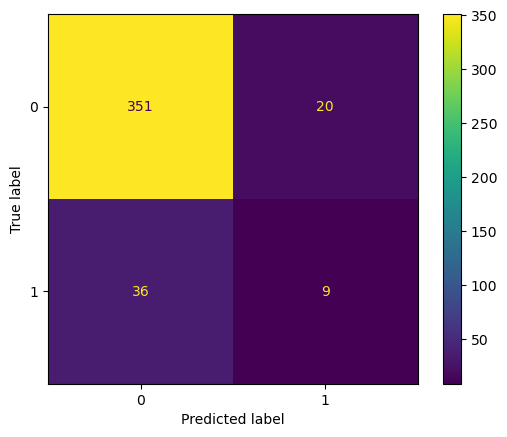

In [235]:
cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.show()

In [236]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5730458221024258


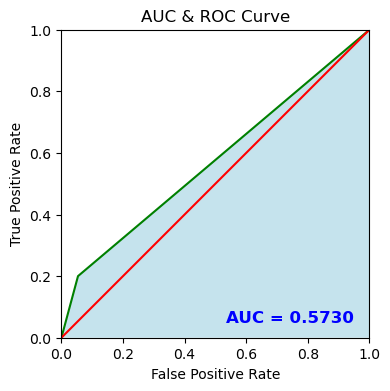

In [237]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### **Predicting Power of Model for True Negative is not getting increased.**

### **Model 4:  XGBoost Classifier**

In [238]:
clf5 = XGBClassifier(random_state = 0)

In [239]:
clf5.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [240]:
y_pred = clf5.predict(X_test)

In [241]:
# Checking the Accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8461538461538461


In [242]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       371
           1       0.24      0.20      0.22        45

    accuracy                           0.85       416
   macro avg       0.57      0.56      0.57       416
weighted avg       0.83      0.85      0.84       416



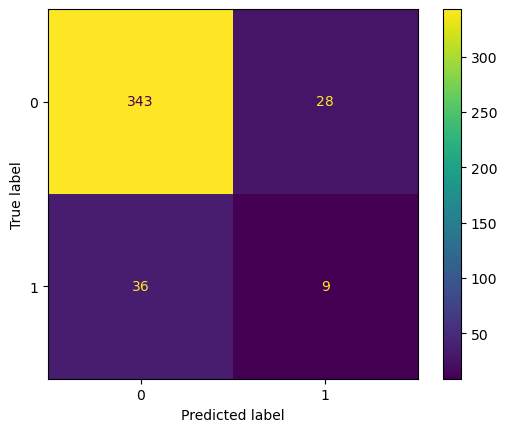

In [243]:
cm = confusion_matrix(y_test, y_pred, labels=clf5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf5.classes_)
disp.plot()
plt.show()

### **- Hyperparameter tuning for XGBoost**

In [244]:
# Defining the hyperparameters
params = {
    'eta': [0.1,0.5,1,1.5,2,3,5,10,15,20,30,50,100],
    'gamma': [0, 0.3, 0.5, 0.8, 1, 2, 5, 10, 15,30, 50,100],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'max_depth' : [0,10,15,20,30,50,75,100,200,1000]
}

In [245]:
grid = RandomizedSearchCV(clf5, params, n_iter = 30, n_jobs = -1, cv=5, random_state = 0, scoring = 'roc_auc')

In [246]:
grid.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'eta': [0.1, 0.5, 1, 1.5, 2, 3, 5, 10,
                                                15, 20, 30, 50, 100],
                                        'gamma': [0, 0.3, 0.5, 0.8, 1, 2, 5, 10,
                                                  15, 30, 50, 100],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'max_depth': [0, 10, 15, 20, 30, 50, 75,
                                                      100, 200, 1000]},
                   random_state=0, scoring='roc_auc')

In [247]:
grid.best_score_

0.981756622638725

In [248]:
grid.best_params_

{'max_depth': 75, 'learning_rate': 0.4, 'gamma': 0, 'eta': 3}

In [249]:
clf5_best = grid.best_estimator_

In [250]:
clf5_best.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=3, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=75,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [251]:
y_pred = clf5_best.predict(X_test)

In [252]:
# Getting the accuracy score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8509615384615384


In [253]:
# Classification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       371
           1       0.26      0.20      0.23        45

    accuracy                           0.85       416
   macro avg       0.58      0.56      0.57       416
weighted avg       0.84      0.85      0.84       416



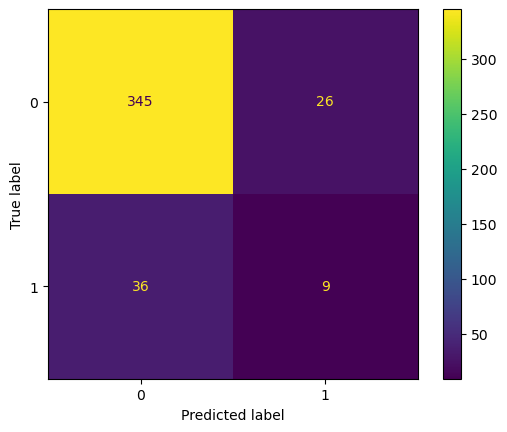

In [254]:

cm = confusion_matrix(y_test, y_pred, labels= clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot()
plt.show()

In [255]:
# define ROC-AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC score:",auc)

AUC score: 0.5649595687331536


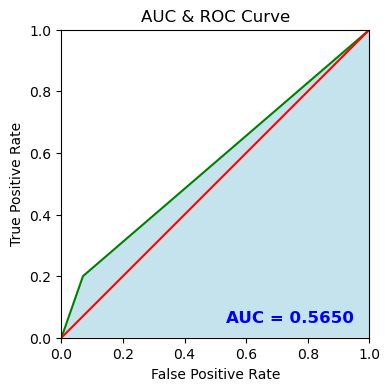

In [256]:
# Visualizing the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thres = roc_curve(y_test, random_probs)

plt.figure(figsize=(5,4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, color= 'green')
plt.plot(p_fpr, p_tpr, color = 'r')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Summary & Conclusion:

We have performed all **5 ML Models** to check our **Accuracy and AUC-Score** which are as below:

| Sr.Nr. | Model | Accuracy | AUC-Score |
| --- | --- | --- | --- |
| 1 | Logistic Regression | 0.6298 | 0.5288 |
| 2 | Decision Tree Classifier | 0.8052 |0.5589 |
| 3 | Support Vector Classifier| 0.7644 |0.5262 |
| 4 | Random Forest Classifier | 0.8653 |0.5730 |
| 5 | XGBoost Classifier | 0.8509 |0.5650 |

We have got **Random Forest with accuarcy of 86%** as the best predictive model out of all. 
Moreover, all models are somehow **failed** to get best predict for **True Negative (TN)** which can be disadvantage for the model. But for better performance furthure we should try some other **sampling techniques** for imbalanced data and try to get AUC-Score better than current score.  